In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#import geopandas as gpd
#import descartes
#from shapely.geometry import Point, Polygon

# Seleccionamos la Comuna 13 de todo el dataset y realizamos una limpieza y extracción de datos

%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

In [197]:
data_location = "../Properati/properati_reducido.csv"
data = pd.read_csv(data_location, sep=",")

In [198]:
(data.isnull().sum() * 100 / len(data)).round(2)#Vemos el % de nulos en cada columna.

Unnamed: 0                     0.00
Unnamed: 0.1                   0.00
operation                      0.00
property_type                  0.00
place_name                     0.00
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
geonames_id                    0.00
lat-lon                       31.17
lat                           31.17
lon                           31.17
price                         12.93
currency                      12.93
price_aprox_local_currency    12.93
price_aprox_usd               12.93
surface_total_in_m2           16.40
surface_covered_in_m2          5.58
price_usd_per_m2              28.72
price_per_m2                  17.83
floor                         92.26
rooms                         58.66
expenses                      74.55
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                1.33
dtype: float64

In [199]:
#Definimos nuestro dataframe a analizar de la comuna 13, agurpamos por place_name y concatenamos los 3 barrios.
data_grupo = data.groupby('place_name')
data_belgrano = data_grupo.get_group('Belgrano')
data_colegiales = data_grupo.get_group('Colegiales')
data_nuñez = data_grupo.get_group('Nuñez')
comuna_13 = [data_belgrano, data_colegiales, data_nuñez]
data_comuna = pd.concat(comuna_13, axis=0)
data_comuna

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
1,8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
2,57,57,sell,store,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5639725,-58.456535",...,30.0,8333.333333,8333.333333,NaN,NaN,NaN,http://www.properati.com.ar/15bv5_venta_local_...,VENTA DE LOCAL SOBRE VÍA PÚBLICA CON RENTA - 3...,Local en Excelente Ubicación - Venta con Renta,https://thumbs4.properati.com/9/m1Sn4i7S8r5Mb-...
3,120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",...,55.0,NaN,3236.363636,12.0,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"Depto de 3 amb. c/cochera cubierta, en piso 12...","Departamento con Plantas en Mendoza 2700, Capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...
4,210,210,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",...,54.0,4210.526316,4444.444444,NaN,2.0,NaN,http://www.properati.com.ar/15dic_venta_depart...,DUPLEX CON COCHERA FIJA CUBIERTA 3 AÑOS DE ANT...,2 Ambientes Venta Belgrano Cochera Cubierta,https://thumbs4.properati.com/4/5UHwVgdJWRAYH5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,120198,120198,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5494807953,-58.4692289413",...,96.0,2688.695652,3220.833333,NaN,3.0,NaN,http://www.properati.com.ar/1chmx_venta_depart...,"Venta de Departamento de 3 AMBIENTE en Nuñez, ...",Crisologo Larralde 2400 - Piso 3 Dpto. D,https://thumbs4.properati.com/8/4CNY46OVPBOFsU...
4118,120199,120199,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5494807953,-58.4692289413",...,40.0,2525.000000,3535.000000,NaN,1.0,NaN,http://www.properati.com.ar/1chmy_venta_depart...,"Venta de Departamento de 1 AMBIENTE en Nuñez, ...",Crisologo Larralde 2400 - Piso 2 Dpto. C,https://thumbs4.properati.com/8/4CNY46OVPBOFsU...
4119,120918,120918,sell,house,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5461039086,-58.4813752522",...,430.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cihm_venta_casa_n...,IMPECABLE CASA DE LADRILLO A L...,Casa - Nuñez,https://thumbs4.properati.com/3/JcBC2mb9geeJLg...
4120,120968,120968,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,NaN,...,55.0,NaN,3181.818182,NaN,NaN,4000.0,http://www.properati.com.ar/1cin1_venta_depart...,"Lindo departamento de 2 amb en Nuñez, living c...",Departamento - Nuñez,https://thumbs4.properati.com/3/Qyjzn11OOB3a3Y...


In [200]:
data_comuna['property_type'].value_counts()

apartment    3727
house         192
PH            102
store         101
Name: property_type, dtype: int64

In [201]:
data_comuna['property_type'].value_counts()

apartment    3727
house         192
PH            102
store         101
Name: property_type, dtype: int64

In [202]:
data_comuna = data_comuna.drop(data_comuna[data_comuna['property_type'] == 'store'].index)

In [203]:
data_comuna.shape

(4021, 27)

# Completamos los datos de superficie

In [204]:
data_superficie_fill = data_comuna.surface_total_in_m2.fillna(data_comuna["surface_covered_in_m2"])
#superficie_fill es la nueva columna con datos de superficie total rellenos con surface_covered
data_comuna["superficie_fill"] = data_superficie_fill  
data_superficie_fill.isnull().sum()

34

In [205]:
#busco esos 34 nulos y trato de completarlos con las columnas de texto libre:
sup_null_mask = data_superficie_fill.isnull() #creo la mascara
data_sup_null = data_comuna.loc[sup_null_mask, :] #la aplico a data_comuna y genero un df
#extraigo m2 :
sup_in_title = data_sup_null.title.str.extract(r"(\d{1,4}).?(?:M|m)2") 
sup_in_url = data_sup_null.properati_url.str.extract(r"(\d{1,4}).?(?:M|m)2")
sup_in_desc = data_sup_null.description.str.extract(r"(\d{1,4}).?(?:M|m)2")
sup_in_text = pd.concat([sup_in_title, sup_in_url, sup_in_desc], axis = 1) #pego columnas con las extracciones
sup_in_text = sup_in_text.fillna(0) #fillna con ceros#fillna con ceros
sup_in_text.columns = ['title', 'url', 'desc']#cambio nombres de columnas
#las convierto en floats
sup_in_text['title'] = sup_in_text['title'].astype(float)
sup_in_text['url'] = sup_in_text['url'].astype(float)
sup_in_text['desc'] = sup_in_text['desc'].astype(float)
sup_in_text['to_fill'] = sup_in_text.max(axis=1)#genero una nueva columna con los registros a llenar
mask_to_fill = sup_in_text['to_fill']>0 #creo mascara para quedarme solo con los registros a llenar
sup_to_fill = sup_in_text.loc[mask_to_fill, :] #creo el df para llenar
sup_to_fill

,title,url,desc,to_fill
240,360.0,0.0,0.0,360.0
1343,0.0,0.0,49.0,49.0
2865,0.0,0.0,55.0,55.0
3276,0.0,0.0,380.0,380.0
3358,0.0,0.0,68.0,68.0


In [206]:
#dropeo las columnas que ya no necesito
stp = sup_to_fill.drop(['title', 'url', 'desc'], axis=1)
stp

,to_fill
240,360.0
1343,49.0
2865,55.0
3276,380.0
3358,68.0


In [207]:
#hago join con data_comuna porque tengo los mismos index
data_comuna = data_comuna.join(stp)
data_comuna.head()

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,to_fill
0,7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,45.0,NaN
1,8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,65.0,NaN
3,120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",...,3236.363636,12.0,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"Depto de 3 amb. c/cochera cubierta, en piso 12...","Departamento con Plantas en Mendoza 2700, Capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...,55.0,NaN
4,210,210,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",...,4444.444444,NaN,2.0,NaN,http://www.properati.com.ar/15dic_venta_depart...,DUPLEX CON COCHERA FIJA CUBIERTA 3 AÑOS DE ANT...,2 Ambientes Venta Belgrano Cochera Cubierta,https://thumbs4.properati.com/4/5UHwVgdJWRAYH5...,57.0,NaN
5,216,216,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5621457,-58.449657",...,3666.666667,NaN,4.0,NaN,http://www.properati.com.ar/15diu_venta_depart...,"Piso de categoría en Barrancas del Belgrano, e...",Piso Barrancas de Belgrano Venta 2 cocheras fi...,https://thumbs4.properati.com/3/83eGl5QZS6Glfm...,160.0,NaN


In [208]:
#creo una mascara con los nulos de superficie para completar
superficie_na_mask = data_comuna.superficie_fill.isna()
superficie_na_mask.sum()

34

In [209]:
#completo los datos recuperados 
data_comuna.loc[superficie_na_mask, 'superficie_fill'] = data_comuna.loc[superficie_na_mask, 'to_fill']

In [210]:
data_comuna["superficie_fill"].isnull().sum()#quedan 29 nulos

29

In [211]:
data_comuna["superficie_fill"].describe()#vemos que hay datos extremos que son errores (min y max)

count    3992.000000
mean      108.467936
std       147.938592
min         0.000000
25%        46.000000
50%        69.000000
75%       119.000000
max      5483.000000
Name: superficie_fill, dtype: float64

In [212]:
#busco valores extremos
data_comuna_sup_mask = (data_comuna["superficie_fill"] < 19) | (data_comuna["superficie_fill"] > 1600)
data_comuna_sup_mask.value_counts()
data_comuna.loc[data_comuna_sup_mask, :]

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,to_fill
749,46473,46473,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,...,2200.000000,5.0,NaN,NaN,http://www.properati.com.ar/1965m_venta_depart...,Edificio ubicado en la calle Sucre entre Av. d...,"Departamento 10m² con 6 Plantas en Sucre, Mcal...",https://thumbs4.properati.com/5/seI4dc_mIz-trk...,10.0,NaN
875,51824,51824,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,...,NaN,5.0,NaN,NaN,http://www.properati.com.ar/19hug_venta_depart...,"Muy Lindo departamento, muy Luminoso. Vista a ...","Departamento 5483m² con Cochera en Vidal 3300,...",https://thumbs4.properati.com/6/PQ026tq4TL_iin...,5483.0,NaN
1137,63093,63093,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563051,-58.464303",...,26.076636,3.0,1.0,NaN,http://www.properati.com.ar/1a86p_venta_depart...,Corredor Responsable: Jorge Salafia - CUCICBA ...,Monoambiente con cocina americana en Belgrano R,https://thumbs4.properati.com/2/6DPwsEZmIjMosE...,2949.0,NaN
3603,50356,50356,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5482229,-58.4558864",...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e7c_venta_depart...,"Cerca del Rio , ubicado sobre Av del Libertado...",Torre Chateau Libertador . Espectaculares vist...,https://thumbs4.properati.com/5/4DBy1f7HU2qpNy...,0.0,NaN
3976,106850,106850,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5542242,-58.4678339",...,2860.909091,NaN,NaN,NaN,http://www.properati.com.ar/1bwy5_venta_depart...,CODIGO: 2230-71 ubicado en: TAMBORINI 2700 - ...,GRAN OPORTUNIDAD A MTS DE AV CABILDO APTO CRED...,https://thumbs4.properati.com/3/LDKA4rVEhmLAf2...,10.0,NaN


In [213]:
#vemos que hay casos donde surface_covered_in_m2 > surface_total_in_m2 
(data_comuna['surface_covered_in_m2'] > data_comuna['superficie_fill']).value_counts()

False    4007
True       14
dtype: int64

In [214]:
# los damos vuelta:
data_comuna['superficie_fill'] = data_comuna[['superficie_fill', 'surface_covered_in_m2']].max(axis=1)

In [215]:
data_comuna["superficie_fill"].describe()#vemos que hay datos extremos que son errores (min y max)

count    3992.00000
mean      108.70992
std       148.01734
min         0.00000
25%        46.00000
50%        69.00000
75%       119.25000
max      5483.00000
Name: superficie_fill, dtype: float64

In [216]:
#vuelvo a buscar valores extremos y veo que quedan 3:
data_comuna_sup_mask = (data_comuna["superficie_fill"] < 19) | (data_comuna["superficie_fill"] > 1600)
data_comuna_sup_mask.value_counts()
data_comuna.loc[data_comuna_sup_mask, :]

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,to_fill
875,51824,51824,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,...,NaN,5.0,NaN,NaN,http://www.properati.com.ar/19hug_venta_depart...,"Muy Lindo departamento, muy Luminoso. Vista a ...","Departamento 5483m² con Cochera en Vidal 3300,...",https://thumbs4.properati.com/6/PQ026tq4TL_iin...,5483.0,NaN
1137,63093,63093,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563051,-58.464303",...,26.076636,3.0,1.0,NaN,http://www.properati.com.ar/1a86p_venta_depart...,Corredor Responsable: Jorge Salafia - CUCICBA ...,Monoambiente con cocina americana en Belgrano R,https://thumbs4.properati.com/2/6DPwsEZmIjMosE...,2949.0,NaN
3603,50356,50356,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5482229,-58.4558864",...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e7c_venta_depart...,"Cerca del Rio , ubicado sobre Av del Libertado...",Torre Chateau Libertador . Espectaculares vist...,https://thumbs4.properati.com/5/4DBy1f7HU2qpNy...,0.0,NaN


In [217]:
#son 3 departamentos, me fijo en description
#print(data_comuna.loc[51824, 'description']) # dice 5483m2 pero por la descripcion es 54,83m2
#print(data_comuna.loc[63093, 'description']) # dice 2949m2 pero por la descripcion es 29,48m2
#print(data_comuna.loc[50356, 'description']) # dice 0 pero en la descripcion es 215m2

In [218]:
#son 3, los imputo 1x1:
data_comuna.loc[51824, 'superficie_fill'] = 55
data_comuna.loc[63093, 'superficie_fill'] = 29
data_comuna.loc[50356, 'superficie_fill'] = 215

In [219]:
#verifico que no hay casos extremos:
data_comuna["superficie_fill"].describe()

count    3995.000000
mean      108.703129
std       147.979114
min         0.000000
25%        46.000000
50%        69.000000
75%       119.500000
max      5483.000000
Name: superficie_fill, dtype: float64

In [220]:
#veo cuantos nulos quedaron
data_comuna["superficie_fill"].isnull().sum()

29

In [221]:
data_comuna.loc[data_comuna["superficie_fill"].isnull()]

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,to_fill
104,7003.0,7003.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.575419,-58.47235",...,NaN,301.0,3.0,NaN,http://www.properati.com.ar/15w81_venta_depart...,Corredor Responsable: Raul Hector Merlo - CUCI...,"LA PAMPA AL 4300, Exclusivo Desarrollo en Pesos",https://thumbs4.properati.com/9/-6_BxSDSqZjrtG...,NaN,NaN
105,7004.0,7004.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5755596566,-58.4726168035",...,NaN,108.0,4.0,NaN,http://www.properati.com.ar/15w84_venta_depart...,Corredor Responsable: Raul Hector Merlo - CUCI...,LA PAMPA 4300 AIR PAMPA POZO EN PESOS,https://thumbs4.properati.com/9/Xk1v0G_QTGvBby...,NaN,NaN
107,7006.0,7006.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.575419,-58.47235",...,NaN,207.0,3.0,NaN,http://www.properati.com.ar/15w88_venta_depart...,Corredor Responsable: Raul Hector Merlo - CUCI...,"LA PAMPA AL 4300, Exclusivo Desarrollo pozo, p...",https://thumbs4.properati.com/9/-6_BxSDSqZjrtG...,NaN,NaN
108,7007.0,7007.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.575507,-58.47265",...,NaN,404.0,4.0,NaN,http://www.properati.com.ar/15w8b_venta_depart...,Corredor Responsable: Raul Hector Merlo - CUCI...,LA PAMPA 4315 Exclusivo Desarrollo en Pesos,https://thumbs4.properati.com/9/-6_BxSDSqZjrtG...,NaN,NaN
182,10418.0,10418.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5542450213,-58.4553977859",...,NaN,NaN,NaN,3500.0,http://www.properati.com.ar/167y1_venta_depart...,Dúplex.Departamento.Frente.Orientación Sudeste...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/2/CZLI-cCoH7k4RC...,NaN,NaN
359,23034.0,23034.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5640320751,-58.4492759623",...,NaN,NaN,NaN,3500.0,http://www.properati.com.ar/17ke3_venta_depart...,CODIGO: 543-0067 ubicado en: O´higgins 1700 7°...,BELGRANO O´higgins 1700 Semipiso tot. externo,https://thumbs4.properati.com/2/SGq_p_N8aKUlhY...,NaN,NaN
392,24907.0,24907.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5528199,-58.4528222",...,NaN,NaN,1.0,NaN,http://www.properati.com.ar/17p9q_venta_depart...,MUY BUEN DEPARTAMENTO DE 1 AMBIENTE !!! EN EDI...,BELGRANO 1 AMBIENTE A ESTRENAR,https://thumbs4.properati.com/4/f55ch2wjaSgmw9...,NaN,NaN
471,30988.0,30988.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.562317,-58.45963",...,NaN,NaN,1.0,NaN,http://www.properati.com.ar/18373_venta_depart...,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Belgrano,https://thumbs4.properati.com/9/yjx5_D9ICSPRBK...,NaN,NaN
519,33720.0,33720.0,sell,house,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.547075,-58.449712",...,NaN,NaN,5.0,NaN,http://www.properati.com.ar/18ah1_venta_casa_b...,Corredor Responsable: Raul Hector Merlo - CUCI...,"CASA EN VENTA EN NUÑEZ, BARRIO RIVER",https://thumbs4.properati.com/9/UoeWlmAJPNPHm_...,NaN,NaN
644,40905.0,40905.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.561708,-58.451554",...,NaN,NaN,4.0,NaN,http://www.properati.com.ar/18sh6_venta_depart...,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Belgrano,https://thumbs4.properati.com/0/i9S1TiSq8nw8Pf...,NaN,NaN


# Completamos los datos de precio m_2

In [222]:
#vemos las columnas de precios en USD y en $:
data_comuna.loc[:, ['price', 'currency', 'price_aprox_local_currency',\
                    'price_aprox_usd',  'price_usd_per_m2', 'price_per_m2']].head()


,price,currency,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2
0,138000.0,USD,2434941.0,138000.0,3066.666667,3450.000000
1,195000.0,USD,3440677.5,195000.0,3000.000000,3250.000000
3,178000.0,USD,3140721.0,178000.0,NaN,3236.363636
4,240000.0,USD,4234680.0,240000.0,4210.526316,4444.444444
5,550000.0,USD,9704475.0,550000.0,3437.500000,3666.666667


In [223]:
data_comuna.loc[:, ['price', 'currency', 'price_aprox_local_currency',\
                    'price_aprox_usd',  'price_usd_per_m2', 'price_per_m2']].describe().round()


,price,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2
count,3505.0,3505.0,3505.0,2872.0,3317.0
mean,624452.0,5792441.0,328286.0,3111.0,8036.0
std,2147398.0,7359551.0,417102.0,1184.0,28571.0
min,23000.0,108852.0,6169.0,31.0,26.0
25%,134000.0,2307018.0,130750.0,2514.0,2787.0
50%,204200.0,3493611.0,198000.0,2919.0,3281.0
75%,398000.0,6352020.0,360000.0,3400.0,3902.0
max,50000000.0,105867000.0,6000000.0,20833.0,692046.0


In [224]:
data_comuna.loc[:, ['price', 'currency', 'price_aprox_local_currency',\
                    'price_aprox_usd',  'price_usd_per_m2', 'price_per_m2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 50356
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       3505 non-null   float64
 1   currency                    3505 non-null   object 
 2   price_aprox_local_currency  3505 non-null   float64
 3   price_aprox_usd             3505 non-null   float64
 4   price_usd_per_m2            2872 non-null   float64
 5   price_per_m2                3317 non-null   float64
dtypes: float64(5), object(1)
memory usage: 380.1+ KB


In [225]:
#price, price_aprox_local_currency y price_aprox_usd tienen los mismos registros
#usamos price_aprox_usd para nuestro análisisde precio por m2, primero vemos los nulos
data_comuna['price_aprox_usd'].isnull().sum()

519

In [226]:
#busco completar datos con  price_usd_per_m2 pero no hay nada
mask_precio_null =  data_comuna['price_aprox_usd'].isnull()
data_comuna.loc[mask_precio_null, 'price_usd_per_m2'].notnull().sum()

0

In [227]:
#creamos columna precio_m2 y vemos valores nulos:
data_comuna['precio_m2'] = data_comuna['price_aprox_usd'] / data_comuna['superficie_fill']
data_comuna['precio_m2'].isnull().sum()

540

In [228]:
#ahora vemos valores extremos
data_comuna['precio_m2'].describe().round()

count     3484.0
mean      3099.0
std       1231.0
min         26.0
25%       2500.0
50%       2918.0
75%       3397.0
max      23450.0
Name: precio_m2, dtype: float64

In [229]:
#buscamos los casos de precio_m2<1000
data_comuna[data_comuna['precio_m2']<1000].shape

(14, 30)

In [230]:
data_comuna[data_comuna['precio_m2']<1000].head()

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,to_fill,precio_m2
333,22580.0,22580.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5812079,-58.4428209",...,NaN,2.0,NaN,http://www.properati.com.ar/17j85_venta_depart...,Venta 2 AMBIENTES en Palermo Hermoso 2 amb a e...,Venta 2 AMBIENTES - PALERMO - DORREGO 1700,https://thumbs4.properati.com/8/_qndRfHDugrjbW...,62.0,NaN,217.098065
875,51824.0,51824.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,...,5.0,NaN,NaN,http://www.properati.com.ar/19hug_venta_depart...,"Muy Lindo departamento, muy Luminoso. Vista a ...","Departamento 5483m² con Cochera en Vidal 3300,...",https://thumbs4.properati.com/6/PQ026tq4TL_iin...,5483.0,NaN,31.369688
1137,63093.0,63093.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563051,-58.464303",...,3.0,1.0,NaN,http://www.properati.com.ar/1a86p_venta_depart...,Corredor Responsable: Jorge Salafia - CUCICBA ...,Monoambiente con cocina americana en Belgrano R,https://thumbs4.properati.com/2/6DPwsEZmIjMosE...,2949.0,NaN,26.076636
2509,109317.0,109317.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",...,NaN,NaN,NaN,http://www.properati.com.ar/1c20t_venta_depart...,Venta desde Pozo!! Comienzo de obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/7/9DCw_ZWNGZSUgp...,82.0,NaN,750.000000
2511,109370.0,109370.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",...,NaN,NaN,NaN,http://www.properati.com.ar/1c22r_venta_depart...,Venta desde Pozo!! Comienzo de Obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/8/ISfuzmE_Hq1rln...,51.0,NaN,750.000000


In [231]:
#vemos que hay precios en dolares que figuran como ARS , al convertir da muy bajo, correjimos:
mask_error_ARS = (data_comuna['precio_m2'] < 1000) & (data_comuna['currency'] =='ARS')
data_comuna.loc[mask_error_ARS,'price_aprox_usd'] = data_comuna['price']

In [232]:
#redefino precio_m2 para que acualice los cambios:
data_comuna['precio_m2'] = data_comuna['price_aprox_usd'] / data_comuna['superficie_fill']

In [233]:
#siguen habiendo 8 casos, los vemos 
data_comuna[data_comuna['precio_m2']<1000].shape

(10, 30)

In [234]:
data_comuna[data_comuna['precio_m2']<1000]

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,to_fill,precio_m2
875,51824.0,51824.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,...,5.0,NaN,NaN,http://www.properati.com.ar/19hug_venta_depart...,"Muy Lindo departamento, muy Luminoso. Vista a ...","Departamento 5483m² con Cochera en Vidal 3300,...",https://thumbs4.properati.com/6/PQ026tq4TL_iin...,5483.0,NaN,31.369688
1137,63093.0,63093.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563051,-58.464303",...,3.0,1.0,NaN,http://www.properati.com.ar/1a86p_venta_depart...,Corredor Responsable: Jorge Salafia - CUCICBA ...,Monoambiente con cocina americana en Belgrano R,https://thumbs4.properati.com/2/6DPwsEZmIjMosE...,2949.0,NaN,26.076636
2509,109317.0,109317.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",...,NaN,NaN,NaN,http://www.properati.com.ar/1c20t_venta_depart...,Venta desde Pozo!! Comienzo de obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/7/9DCw_ZWNGZSUgp...,82.0,NaN,750.000000
2511,109370.0,109370.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",...,NaN,NaN,NaN,http://www.properati.com.ar/1c22r_venta_depart...,Venta desde Pozo!! Comienzo de Obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/8/ISfuzmE_Hq1rln...,51.0,NaN,750.000000
2512,109375.0,109375.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",...,NaN,NaN,NaN,http://www.properati.com.ar/1c22w_venta_depart...,Venta desde Pozo!! Comienzo de Obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/6/uymHdYSucYF1LX...,54.0,NaN,750.000000
2583,112269.0,112269.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",...,NaN,NaN,NaN,http://www.properati.com.ar/1c6qb_venta_depart...,Venta desde Pozo!! Comienzo de Obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/6/OebWvgHxvz9_GU...,39.0,NaN,750.000000
3106,41909.0,41909.0,sell,house,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,3435356.0,"-34.6108387,-58.5005758",...,NaN,4.0,NaN,http://www.properati.com.ar/18vba_venta_casa_c...,Villa Rosas - Excelente sector - Casa 2 dorm c...,VILLA ROSAS - ENTREGA + FINANC. 12 MESES - IMP...,https://thumbs4.properati.com/6/LnAuPzwsCIIa71...,120.0,NaN,500.000000
3257,80920.0,80920.0,sell,apartment,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,3435356.0,"-34.5797947302,-58.4534741139",...,NaN,NaN,NaN,http://www.properati.com.ar/1axe5_venta_depart...,Transnferencia de Adhesion a Fideicomiso. El c...,Departamento en Colegiales,https://thumbs4.properati.com/2/XMS3iOkwmiM1j9...,47.0,NaN,638.297872
3406,17345.0,17345.0,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5362412,-58.4680035",...,NaN,NaN,NaN,http://www.properati.com.ar/171kx_venta_depart...,"Exclusivo dúplex de 92m2, que consta de 3 ambi...",DUPLEX DE 3 AMBIENTES EN EXCELENTE ESTADO,https://thumbs4.properati.com/1/i9pZUTdQG_9AZ2...,92.0,NaN,250.000000
3563,46548.0,46548.0,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5432142,-58.4644334",...,NaN,NaN,NaN,http://www.properati.com.ar/196a1_venta_depart...,CODIGO: 3746-c20 ubicado en: J.J. de Urquiza 3...,Casa en VENTA- Caseros,https://thumbs4.properati.com/3/QLB7unhqvE0bSR...,240.0,NaN,416.666667


In [235]:
#son casos para dropear:  mal place_name,fideicomiso,  habitado,  en pozo)
#depto en pozo, fideicomiso, habitados)
#los selecciono y verifico que son los mismos:
index_m2_bajo_drop = data_comuna[ data_comuna['precio_m2']<1000].index
index_m2_bajo_drop

Int64Index([875, 1137, 2509, 2511, 2512, 2583, 3106, 3257, 3406, 3563], dtype='int64')

In [236]:
#dropeo:
data_comuna.drop(index_m2_bajo_drop , inplace=True)

In [237]:
#chequeo que no hay mas:
data_comuna[data_comuna['precio_m2']<1000].shape

(0, 30)

In [238]:
#vuelvo a mirar los valores de precio_m2 
data_comuna['precio_m2'].describe()

count     3474.000000
mean      3110.372027
std       1221.447977
min       1000.000000
25%       2508.807115
50%       2920.703307
75%       3400.000000
max      23450.000000
Name: precio_m2, dtype: float64

In [239]:
#Ahora buscamos los casos de precio_m2>15000
data_comuna[data_comuna['precio_m2']>15000].shape

(5, 30)

In [240]:
data_comuna[data_comuna['precio_m2']>15000].sort_values('precio_m2')

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,to_fill,precio_m2
546,34703.0,34703.0,sell,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.568461,-58.473233",...,NaN,5.0,NaN,http://www.properati.com.ar/18cmx_venta_ph_vil...,Corredor Responsable: Gustavo Guastello - C.U....,PH EN VENTA BELGRANO R 5 AMBIENTES FTE. APTO P...,https://thumbs4.properati.com/7/HTsKesOSXvTOzL...,20.0,NaN,16000.0
2527,109767.0,109767.0,sell,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.56498,-58.452088",...,NaN,6.0,NaN,http://www.properati.com.ar/1c2n3_venta_ph_bel...,Corredor Responsable: Win Bienes Raices SRL - ...,PH 4/5 amb. C/PATIO-Quincho GRAN UBICAC. Bjas exp,https://thumbs4.properati.com/8/OSvvSMINs3ZhY-...,20.0,NaN,19950.0
175,10305.0,10305.0,sell,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.567449,-58.461868",...,NaN,5.0,NaN,http://www.properati.com.ar/1672w_venta_ph_bel...,Corredor Responsable: Gustavo Guastello - C.U....,"PH Casa Belgrano R, 5 amb +.",https://thumbs4.properati.com/3/JvSDyLc-DdfXcM...,20.0,NaN,21000.0
735,45595.0,45595.0,sell,house,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.567017,-58.453898",...,NaN,4.0,NaN,http://www.properati.com.ar/194gx_venta_casa_b...,Corredor Responsable: Gustavo Guastello - C.U....,CASA BELGRANO,https://thumbs4.properati.com/3/x9O4sHUT0tXROl...,20.0,NaN,23000.0
3690,63098.0,63098.0,sell,house,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.546651259,-58.4592113562",...,NaN,4.0,NaN,http://www.properati.com.ar/1a871_venta_casa_n...,Corredor Responsable: Gustavo Guastello - C.U....,"VENTA DE CASA EN NÚÑEZ, 4 AMBIENTES",https://thumbs4.properati.com/8/0nJE0-4eMDDANW...,20.0,NaN,23450.0


In [241]:
# son 5 propiedades que figuran con 20m2 de superficie, buscamos en los campos de texto libre si lo podemos completar

data_pm2_alto = data_comuna[data_comuna['precio_m2']>15000].sort_values('precio_m2')

In [242]:
sup_desc_pm2_bajo = data_pm2_alto.description.str.extract(r"(\d{1,4}).?(?:M|m)2")
sup_desc_pm2_bajo.columns =['sup_regex']
sup_desc_pm2_bajo['sup_regex'] = sup_desc_pm2_bajo['sup_regex'].astype(float)
sup_desc_pm2_bajo

,sup_regex
546,NaN
2527,138.0
175,NaN
735,60.0
3690,NaN


In [243]:
#hago join con data_comuna porque tengo los mismos index
data_comuna = data_comuna.join(sup_desc_pm2_bajo)
data_comuna.head()

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,to_fill,precio_m2,sup_regex
0,7.0,7.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,45.0,NaN,3066.666667,NaN
1,8.0,8.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,65.0,NaN,3000.000000,NaN
3,120.0,120.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",...,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"Depto de 3 amb. c/cochera cubierta, en piso 12...","Departamento con Plantas en Mendoza 2700, Capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...,55.0,NaN,3236.363636,NaN
4,210.0,210.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",...,2.0,NaN,http://www.properati.com.ar/15dic_venta_depart...,DUPLEX CON COCHERA FIJA CUBIERTA 3 AÑOS DE ANT...,2 Ambientes Venta Belgrano Cochera Cubierta,https://thumbs4.properati.com/4/5UHwVgdJWRAYH5...,57.0,NaN,4210.526316,NaN
5,216.0,216.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5621457,-58.449657",...,4.0,NaN,http://www.properati.com.ar/15diu_venta_depart...,"Piso de categoría en Barrancas del Belgrano, e...",Piso Barrancas de Belgrano Venta 2 cocheras fi...,https://thumbs4.properati.com/3/83eGl5QZS6Glfm...,160.0,NaN,3437.500000,NaN


In [244]:
#creo una mascara con los nulos de superficie para completar
sup20_na_mask = data_comuna['sup_regex'].notna()
sup20_na_mask

0        False
1        False
3        False
4        False
5        False
         ...  
4120     False
4121     False
51824    False
63093    False
50356    False
Name: sup_regex, Length: 4014, dtype: bool

In [245]:
#completo los datos recuperados 
data_comuna.loc[sup20_na_mask, 'superficie_fill'] = data_comuna.loc[sup20_na_mask, 'sup_regex']

In [246]:
#redefino precio_m2 para que acualice los cambios:
data_comuna['precio_m2'] = data_comuna['price_aprox_usd'] / data_comuna['superficie_fill']

In [247]:
#imputo esos 2 y quedan 3 que imputaremos con superficie de los ambientes
data_comuna[data_comuna['precio_m2']>15000].sort_values('precio_m2')

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,to_fill,precio_m2,sup_regex
546,34703.0,34703.0,sell,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.568461,-58.473233",...,5.0,NaN,http://www.properati.com.ar/18cmx_venta_ph_vil...,Corredor Responsable: Gustavo Guastello - C.U....,PH EN VENTA BELGRANO R 5 AMBIENTES FTE. APTO P...,https://thumbs4.properati.com/7/HTsKesOSXvTOzL...,20.0,NaN,16000.0,NaN
175,10305.0,10305.0,sell,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.567449,-58.461868",...,5.0,NaN,http://www.properati.com.ar/1672w_venta_ph_bel...,Corredor Responsable: Gustavo Guastello - C.U....,"PH Casa Belgrano R, 5 amb +.",https://thumbs4.properati.com/3/JvSDyLc-DdfXcM...,20.0,NaN,21000.0,NaN
3690,63098.0,63098.0,sell,house,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.546651259,-58.4592113562",...,4.0,NaN,http://www.properati.com.ar/1a871_venta_casa_n...,Corredor Responsable: Gustavo Guastello - C.U....,"VENTA DE CASA EN NÚÑEZ, 4 AMBIENTES",https://thumbs4.properati.com/8/0nJE0-4eMDDANW...,20.0,NaN,23450.0,NaN


In [248]:
data_comuna.precio_m2

0        3066.666667
1        3000.000000
3        3236.363636
4        4210.526316
5        3437.500000
            ...     
4120     3181.818182
4121     1935.483871
51824            NaN
63093            NaN
50356            NaN
Name: precio_m2, Length: 4014, dtype: float64

In [249]:
data_comuna["precio_m2"].isnull().sum()

540

#  Dropeo los que quedaron nulos para poder usar y_train

In [250]:
data_comuna.dropna(subset = ["precio_m2"], inplace=True)

In [251]:
data_comuna["precio_m2"].isnull().sum()

0

# Completamos Amenities

In [252]:
#Pasamos a minuscula la columna description, title y properati_url para extraer mas facil palabras clave
data_comuna["description"] = data_comuna["description"].str.lower()
data_comuna["title"] = data_comuna["title"].str.lower()
data_comuna["properati_url"] = data_comuna["properati_url"].str.lower()

In [253]:
#extraemos de estas columnas las palabras clave y creamos una columna con True/False para cada una:
pattern = r"terraza"
data_comuna["Terraza"] = data_comuna["description"].str.contains(pattern) | data_comuna["properati_url"].str.contains(pattern) | data_comuna["title"].str.contains(pattern)

pattern2 = r"subte"
data_comuna["Subte"] = data_comuna["description"].str.contains(pattern2) | data_comuna["properati_url"].str.contains(pattern2) | data_comuna["title"].str.contains(pattern2)

pattern3 = r"parrilla"
data_comuna["Parrilla"] = data_comuna["description"].str.contains(pattern3) | data_comuna["properati_url"].str.contains(pattern3) | data_comuna["title"].str.contains(pattern3)

pattern4 = r"(pileta|piscina|picina)"
data_comuna["Pileta"] = data_comuna["description"].str.contains(pattern4) | data_comuna["properati_url"].str.contains(pattern4) | data_comuna["title"].str.contains(pattern4)

pattern5 = r"(balcon|balcón)"
data_comuna["Balcon"] = data_comuna["description"].str.contains(pattern5) | data_comuna["properati_url"].str.contains(pattern5) | data_comuna["title"].str.contains(pattern5)

pattern6 = r"(cochera|garage|guardacoche)"
data_comuna["Cochera"] = data_comuna["description"].str.contains(pattern6) | data_comuna["properati_url"].str.contains(pattern6) | data_comuna["title"].str.contains(pattern6)

pattern10 = r"baulera"
data_comuna["Baulera"] = data_comuna["description"].str.contains(pattern10) | data_comuna["properati_url"].str.contains(pattern10) | data_comuna["title"].str.contains(pattern10)

pattern11 = r"(jardin|jardín)"
data_comuna["Jardin"] = data_comuna["description"].str.contains(pattern11) | data_comuna["properati_url"].str.contains(pattern11) | data_comuna["title"].str.contains(pattern11)

pattern12 = r"(lavadero|laundry)"
data_comuna["Lavadero"] = data_comuna["description"].str.contains(pattern12) | data_comuna["properati_url"].str.contains(pattern12) | data_comuna["title"].str.contains(pattern12)

pattern14 = r"(luminoso|lleno\s*de\s*luz|lleno.?de.?luz)"
data_comuna["Luminoso"] = data_comuna["description"].str.contains(pattern14) | data_comuna["properati_url"].str.contains(pattern14) | data_comuna["title"].str.contains(pattern14)
#extraemos rooms de las columnas description, title y properati_url

pattern15 = r"patio"
data_comuna["Patio"] = data_comuna["description"].str.contains(pattern15) | data_comuna["properati_url"].str.contains(pattern15) | data_comuna["title"].str.contains(pattern15)

pattern16 = r"(gym|gimnasio|gimnacio)"
data_comuna["Gimnasio"] = data_comuna["description"].str.contains(pattern16) | data_comuna["properati_url"].str.contains(pattern16) | data_comuna["title"].str.contains(pattern16)

patternsum = r"(sum|usos\s*multiples|usos.?multiples|usos\s*múltiples|usos.?múltiples)"
data_comuna["Sum"] = data_comuna["description"].str.contains(patternsum) | data_comuna["properati_url"].str.contains(patternsum) | data_comuna["title"].str.contains(patternsum)

patternestrenar = r"estrenar"
data_comuna["Estrenar"] = data_comuna["description"].str.contains(patternestrenar) | data_comuna["properati_url"].str.contains(patternestrenar) | data_comuna["title"].str.contains(patternestrenar)

pattern23 = r"toilette"
data_comuna["Toilette"] = data_comuna["description"].str.contains(pattern23) | data_comuna["properati_url"].str.contains(pattern23) | data_comuna["title"].str.contains(pattern23)

pattern24 = r"(sauna|hidromasaje)"
data_comuna["Sauna"] = data_comuna["description"].str.contains(pattern24) | data_comuna["properati_url"].str.contains(pattern24) | data_comuna["title"].str.contains(pattern24)

pattern25 = r"suite"
data_comuna["Suite"] = data_comuna["description"].str.contains(pattern25) | data_comuna["properati_url"].str.contains(pattern25) | data_comuna["title"].str.contains(pattern25)

pattern26 = r"vestidor"
data_comuna["Vestidor"] = data_comuna["description"].str.contains(pattern26) | data_comuna["properati_url"].str.contains(pattern26) | data_comuna["title"].str.contains(pattern26)

pattern27 = r"(dependecia|dependencias)"
data_comuna["Dependencia"] = data_comuna["description"].str.contains(pattern27) | data_comuna["properati_url"].str.contains(pattern27) | data_comuna["title"].str.contains(pattern27)

pattern28 = r"lujoso"
data_comuna["Lujoso"] = data_comuna["description"].str.contains(pattern28) | data_comuna["properati_url"].str.contains(pattern28) | data_comuna["title"].str.contains(pattern28)

pattern29 = r"amenities"
data_comuna["Amenities"] = data_comuna["description"].str.contains(pattern29) | data_comuna["properati_url"].str.contains(pattern29) | data_comuna["title"].str.contains(pattern29)

parquet = r"(parquet|piso\s*de\s*madera|pisos\s*de\s*madera|pisos.?de.?madera|piso.?de.?madera)"
data_comuna["Parquet"] = data_comuna["description"].str.contains(parquet) | data_comuna["properati_url"].str.contains(parquet) | data_comuna["title"].str.contains(parquet)

pattern30 = r"(aire(\s*|.?)acondicionado|aireacondicionado)"
pattern33 = r"aire.?acondicionado"
data_comuna["Aire"] = data_comuna["description"].str.contains(pattern30) | data_comuna["properati_url"].str.contains(pattern33) | data_comuna["title"].str.contains(pattern30)

pattern31 = r"(bajas\s*expensas|expensas\s*bajas)"
pattern32 = r"(bajas.?expensas|expensas.?bajas)"
data_comuna["BajasExpensas"] = data_comuna["description"].str.contains(pattern31) | data_comuna["properati_url"].str.contains(pattern32) | data_comuna["title"].str.contains(pattern31)

semipisor = r"(Semipiso|semipiso|semi\s*piso)"
data_comuna["semipiso"] = data_comuna["description"].str.contains(semipisor) | data_comuna["properati_url"].str.contains(semipisor) | data_comuna["title"].str.contains(semipisor)

monoambienter = r"monoambiente"
data_comuna["monoambiente"] = data_comuna["description"].str.contains(monoambienter) | data_comuna["properati_url"].str.contains(monoambienter) | data_comuna["title"].str.contains(monoambienter)

duplexr = r"duplex"
data_comuna["duplex"] = data_comuna["description"].str.contains(duplexr) | data_comuna["properati_url"].str.contains(duplexr) | data_comuna["title"].str.contains(duplexr)

#pattern_playroom = r"playroom"
#data_comuna["Playroom"] = data_comuna["description"].str.contains(pattern_playroom) | data_comuna["properati_url"].str.contains(pattern_playroom) | data_comuna["title"].str.contains(pattern_playroom)

#pattern_cred = r"(apto\s*credito)"
#pattern_cred_url = r"apto.?credito"
#data_comuna["AptoCredito"] = data_comuna["description"].str.contains(pattern_cred) | data_comuna["properati_url"].str.contains(pattern_cred_url) | data_comuna["title"].str.contains(pattern_cred)

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [254]:

pattern7 = r"((\d)\s*(dormitorio|habitacion))"
pattern9 = r"(\d).?ambientes" #este es para _ Para usar con properati_url

data_comuna["Habitaciones"] = ""
data_comuna["Habitaciones"] = data_comuna["description"].str.extract(pattern7).fillna(data_comuna["title"].str.extract(pattern7).fillna(data_comuna["properati_url"].str.extract(pattern9))) #extraes cantidad de dormitorios de title y description
data_comuna["Habitaciones"] = data_comuna["Habitaciones"].str.extract(r"(\d)") #extraigo solo el numero sin la palabra dormitorios para que no sea un st y poder sumarle + 1

data_comuna["Habitaciones"] = pd.to_numeric(data_comuna["Habitaciones"], downcast='float') #como era object la columna, la paso a float

pattern8 = r"(\d)\s*ambientes"  #extraes x ambientes de columnas
data_comuna["Ambientes"] = data_comuna["description"].str.extract(pattern8).fillna(data_comuna["title"].str.extract(pattern8))
data_comuna["Ambientes"] = data_comuna["Ambientes"].str.extract(r"(\d)") #reducis a un numero

data_comuna["Ambientes"] = pd.to_numeric(data_comuna["Ambientes"], downcast='float') #pasas a float la columna
masuno = (data_comuna["Habitaciones"] + 1)
data_comuna["Ambientes"] = data_comuna.Ambientes.fillna(masuno) #a los datos de habitacion le sumas uno y rellenas con esa data que no te relleno el pattern de ambientes

data_comuna["Ambientes"] = data_comuna.Ambientes.fillna(data_comuna["rooms"]) #rellenas ambientes con rooms
data_comuna.head(10)

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,Lujoso,Amenities,Parquet,Aire,BajasExpensas,semipiso,monoambiente,duplex,Habitaciones,Ambientes
0,7.0,7.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,False,False,False,False,False,False,True,False,NaN,NaN
1,8.0,8.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,False,False,False,False,False,False,False,False,NaN,NaN
3,120.0,120.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",...,False,False,True,False,False,False,False,False,NaN,NaN
4,210.0,210.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",...,False,False,False,False,False,False,False,True,1.0,2.0
5,216.0,216.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5621457,-58.449657",...,True,False,True,True,False,False,False,False,3.0,4.0
6,219.0,219.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.565318066,-58.4417518602",...,True,False,False,False,False,False,False,False,4.0,5.0
7,220.0,220.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5652650561,-58.438232802",...,False,False,False,False,False,False,False,True,NaN,2.0
8,221.0,221.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5652650561,-58.438232802",...,False,False,False,False,False,False,False,True,NaN,2.0
10,229.0,229.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5640079,-58.4567043",...,False,True,False,False,False,False,True,False,NaN,1.0
11,253.0,253.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",...,False,False,True,False,False,False,False,False,NaN,4.0


In [255]:
#extraigo cantidad de banos
pattern20 = r"((\d)\s*(baño|toilette|toilettes|bano|baños|banos|banios))|((baño|toilette|toilettes|bano|baños|banos|banios\s*(\d)))"
pattern21 = r"((\d).?(baño|toilette|toilettes|bano|baños|banos|banios))|((baño|toilette|toilettes|bano|baños|banos|banios.?(\d)))"
data_comuna["Banos"] = "" #creo columna vacia
data_comuna["Banos"] = data_comuna["description"].str.extract(pattern20).fillna(data_comuna["title"].str.extract(pattern20).fillna(data_comuna["properati_url"].str.extract(pattern21)))
data_comuna["Banos"] = data_comuna["Banos"].str.extract(r"(\d)") #reducis a un numero
data_comuna["Banos"] = pd.to_numeric(data_comuna["Banos"], downcast='float')
data_comuna["Banos"].value_counts()

2.0    136
1.0     93
3.0     50
4.0     13
0.0      9
5.0      3
6.0      1
Name: Banos, dtype: int64

In [256]:
pattern22 = r"(baño|bano|banio)"
data_comuna["Banos1"] = data_comuna["description"].str.contains(pattern22) | data_comuna["properati_url"].str.contains(pattern22) | data_comuna["title"].str.contains(pattern22)
data_comuna.Banos1 = data_comuna.Banos1.replace({True: 1, False: 0}) #Le pones un 1 si encontro la palabra bano al resto
#pasas a Nan los 0
data_comuna["Banos1"].replace(0, np.nan, inplace=True)
columna_banos = data_comuna["Banos"]

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [257]:
#Llenas la columna original de banos con la de 1 bano
banos1 = data_comuna["Banos1"]
data_comuna["Banos"] = data_comuna.Banos.fillna(banos1)
data_comuna.Banos.isnull().sum()

1185

In [258]:
data_comuna["Banos"].replace(0, np.nan, inplace=True)
data_comuna["Banos"].value_counts()  #reemplazo por Nan los que me quedaron con 0

1.0    2077
2.0     136
3.0      50
4.0      13
5.0       3
6.0       1
Name: Banos, dtype: int64

In [259]:
#Extraemos orientacion al este, norte o noreste

patterneste = r"(este|noreste|norte)"
data_comuna["Orientacion"] = data_comuna["description"].str.contains(patterneste) | data_comuna["properati_url"].str.contains(patterneste) | data_comuna["title"].str.contains(patterneste)

In [260]:
#Extraemos expensas

expensas1 = r"(expensas\s*(\d\d\d\d)|(\d\d\d\d)\s*expensas|expensas\$\s*(\d\d\d\d)|expensas\$\s*(\d\d\d\d)|expensas\s*\$(\d\d\d\d)|expensas\$(\d\d\d\d))"
expensas2 = r"(expensas.?(\d\d\d\d)|(\d\d\d\d).?expensas|expensas\$.?(\d\d\d\d)|expensas\$\.?(\d\d\d\d)|expensas.?\$(\d\d\d\d)|expensas\$(\d\d\d\d))"
data_comuna["Expensas"] = ""
data_comuna["Expensas"] = data_comuna["description"].str.extract(expensas1).fillna(data_comuna["title"].str.extract(expensas1).fillna(data_comuna["properati_url"].str.extract(expensas2)))
data_comuna["Expensas"] = data_comuna["Expensas"].str.extract(r"(\d\d\d\d)") #reducis a un numero
data_comuna["Expensas"] = pd.to_numeric(data_comuna["Expensas"], downcast='float')
data_comuna["Expensas"].notnull().sum()

47

In [261]:
data_comuna["Expensas"] = data_comuna.Expensas.fillna(data_comuna["expenses"])
data_comuna["Expensas"].isnull().sum()

2465

In [262]:
#asignarle 0 expensas a las casas
data_comuna.loc[(data_comuna.property_type == "house"), "Expensas"] = 0
data_comuna["Expensas"].notnull().sum()
data_comuna["Expensas"] = pd.to_numeric(data_comuna["Expensas"], downcast='float')

In [263]:
data_comuna["Expensas"].isnull().sum()
#A expensas despues hay que imputarlas con las medias

2305

In [264]:
#Paso a numericas las columnas booleanas que teníamos de palabras clave
data_comuna.Parrilla = data_comuna.Parrilla.replace({True: 1, False: 0})
data_comuna.Terraza = data_comuna.Terraza.replace({True: 1, False: 0})
data_comuna.Pileta = data_comuna.Pileta.replace({True: 1, False: 0})
data_comuna.Balcon = data_comuna.Balcon.replace({True: 1, False: 0})
data_comuna.Cochera = data_comuna.Cochera.replace({True: 1, False: 0})
data_comuna.Baulera = data_comuna.Baulera.replace({True: 1, False: 0})
data_comuna.Jardin = data_comuna.Jardin.replace({True: 1, False: 0})
data_comuna.Lavadero = data_comuna.Lavadero.replace({True: 1, False: 0})
data_comuna.Luminoso = data_comuna.Luminoso.replace({True: 1, False: 0})
data_comuna.Patio = data_comuna.Patio.replace({True: 1, False: 0})
data_comuna.Gimnasio = data_comuna.Gimnasio.replace({True: 1, False: 0})
data_comuna.Sum = data_comuna.Sum.replace({True: 1, False: 0})
data_comuna.Estrenar = data_comuna.Estrenar.replace({True: 1, False: 0})
data_comuna.Toilette = data_comuna.Toilette.replace({True: 1, False: 0})
data_comuna.Sauna = data_comuna.Sauna.replace({True: 1, False: 0})
data_comuna.Suite = data_comuna.Suite.replace({True: 1, False: 0})
data_comuna.Vestidor = data_comuna.Vestidor.replace({True: 1, False: 0})
data_comuna.Dependencia = data_comuna.Dependencia.replace({True: 1, False: 0})
data_comuna.Lujoso = data_comuna.Lujoso.replace({True: 1, False: 0})
data_comuna.Amenities = data_comuna.Amenities.replace({True: 1, False: 0})
data_comuna.Aire = data_comuna.Aire.replace({True: 1, False: 0})
data_comuna.Orientacion = data_comuna.Orientacion.replace({True: 1, False: 0})
data_comuna.BajasExpensas = data_comuna.BajasExpensas.replace({True: 1, False: 0})
data_comuna.Parquet = data_comuna.Parquet.replace({True: 1, False: 0})
data_comuna.Subte = data_comuna.Subte.replace({True: 1, False: 0})
data_comuna.semipiso = data_comuna.semipiso.replace({True: 1, False: 0})
data_comuna.monoambiente = data_comuna.monoambiente.replace({True: 1, False: 0})
data_comuna.duplex = data_comuna.duplex.replace({True: 1, False: 0})
#data_comuna.Playroom = data_comuna.Playroom.replace({True: 1, False: 0})
#data_comuna.AptoCredito = data_comuna.AptoCredito.replace({True: 1, False: 0})

In [265]:
data_comuna["Ambientes"].isnull().sum()

907

In [266]:
#rellenamos Ambientes con la columna monoambiente. Si monoambiente es 1, osea True, que le asigne 1 a ambientes
data_comuna.loc[(data_comuna.monoambiente == 1), "Ambientes"] = 1
data_comuna["Ambientes"].isnull().sum()

695

In [267]:
#Pasar a numerica la columna Barrio (place_name)
barrio_dummies = pd.get_dummies(data_comuna.place_name, prefix='Barrio')
barrio_dummies.drop(barrio_dummies.columns[0], axis=1, inplace=True)
data_comuna = pd.concat([data_comuna, barrio_dummies], axis=1)
data_comuna.sample(n=5)

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,monoambiente,duplex,Habitaciones,Ambientes,Banos,Banos1,Orientacion,Expensas,Barrio_Colegiales,Barrio_Nuñez
207,12636.0,12636.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.556844,-58.457941",...,1,0,NaN,1.0,1.0,1.0,0,NaN,0,0
1543,74270.0,74270.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5715835431,-58.4493782913",...,1,0,2.0,1.0,1.0,1.0,0,NaN,0,0
298,18982.0,18982.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5650578,-58.4407198",...,0,0,3.0,4.0,1.0,1.0,0,NaN,0,0
577,36991.0,36991.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5614866,-58.467082",...,1,0,NaN,1.0,1.0,1.0,1,NaN,0,0
3502,36239.0,36239.0,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5384369941,-58.4653930772",...,0,0,NaN,3.0,1.0,1.0,1,NaN,0,1


In [268]:
#Pasar a numerica la columna property_type
tipo_dummies = pd.get_dummies(data_comuna.property_type, prefix='Tipo')
tipo_dummies.drop(tipo_dummies.columns[0], axis=1, inplace=True)
data_comuna = pd.concat([data_comuna, tipo_dummies], axis=1)
data_comuna.sample(n=5)

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,Habitaciones,Ambientes,Banos,Banos1,Orientacion,Expensas,Barrio_Colegiales,Barrio_Nuñez,Tipo_apartment,Tipo_house
3874,81333.0,81333.0,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5477689,-58.456525",...,3.0,4.0,1.0,1.0,0,13250.0,0,1,1,0
1796,81110.0,81110.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5562216628,-58.4586790175",...,2.0,3.0,NaN,NaN,0,2030.0,0,0,1,0
3130,47795.0,47795.0,sell,apartment,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,3435356.0,"-34.578333,-58.453512",...,NaN,3.0,1.0,1.0,0,NaN,1,0,1,0
1247,66763.0,66763.0,sell,house,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5736740414,-58.4587064042",...,NaN,NaN,1.0,1.0,0,0.0,0,0,0,1
1835,81667.0,81667.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5477689,-58.456525",...,4.0,5.0,NaN,NaN,1,NaN,0,0,1,0


## Agregamos distancias a Tren y Subte

In [269]:
#creamos la funcion para sacar la distancia en km entre dos puntos
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [270]:
#creamos un np con vacios y luego rellenamos cada np con su respectiva lat/lon. Luego lo insertamos a la funcion.
# y asi sucesivamente con todas las estaciones de subte y tren que se observan mas abajo
data_comuna['Subte_D_Congreso_lat'] = np.nan
data_comuna['Subte_D_Congreso_lat'] = data_comuna.Subte_D_Congreso_lat.fillna(value=-34.5571374)
data_comuna['Subte_D_Congreso_lon'] = np.nan
data_comuna['Subte_D_Congreso_lon'] = data_comuna.Subte_D_Congreso_lon.fillna(value=-58.4575053)
data_comuna['km_Sub_D_Cong']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_Congreso_lon'],
                                 data_comuna['Subte_D_Congreso_lat'])

data_comuna['Subte_D_Juramento_lon'] = np.nan
data_comuna['Subte_D_Juramento_lon'] = data_comuna.Subte_D_Juramento_lon.fillna(value=-58.4587651)
data_comuna['Subte_D_Juramento_lat'] = np.nan
data_comuna['Subte_D_Juramento_lat'] = data_comuna.Subte_D_Juramento_lat.fillna(value=-34.5641916)
data_comuna['km_Sub_D_Jur']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_Juramento_lon'],
                                 data_comuna['Subte_D_Juramento_lat'])

data_comuna['Subte_D_JHer_lat'] = np.nan
data_comuna['Subte_D_JHer_lat'] = data_comuna.Subte_D_JHer_lat.fillna(value=-34.564955)
data_comuna['Subte_D_JHer_lon'] = np.nan
data_comuna['Subte_D_JHer_lon'] = data_comuna.Subte_D_JHer_lon.fillna(value=-58.4568437)
data_comuna['km_Sub_D_JHer']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_JHer_lon'],
                                 data_comuna['Subte_D_JHer_lat'])

data_comuna['Subte_D_Carranza_lat'] = np.nan
data_comuna['Subte_D_Carranza_lat'] = data_comuna.Subte_D_Carranza_lat.fillna(value=-34.574965)
data_comuna['Subte_D_Carranza_lon'] = np.nan
data_comuna['Subte_D_Carranza_lon'] = data_comuna.Subte_D_Carranza_lon.fillna(value=-58.4388989)
data_comuna['km_Sub_D_Carranza']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_Carranza_lon'],
                                 data_comuna['Subte_D_Carranza_lat'])

data_comuna['Subte_D_Palermo_lat'] = np.nan
data_comuna['Subte_D_Palermo_lat'] = data_comuna.Subte_D_Palermo_lat.fillna(value=-34.5788068)
data_comuna['Subte_D_Palermo_lon'] = np.nan
data_comuna['Subte_D_Palermo_lon'] = data_comuna.Subte_D_Palermo_lon.fillna(value=-58.4291623)
data_comuna['km_Sub_D_Palermo']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_Palermo_lon'],
                                 data_comuna['Subte_D_Palermo_lat'])

data_comuna['Subte_D_PItalia_lat'] = np.nan
data_comuna['Subte_D_PItalia_lat'] = data_comuna.Subte_D_PItalia_lat.fillna(value=-34.582094)
data_comuna['Subte_D_PItalia_lon'] = np.nan
data_comuna['Subte_D_PItalia_lon'] = data_comuna.Subte_D_PItalia_lon.fillna(value=-58.4223377)
data_comuna['km_Sub_D_PItalia']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_PItalia_lon'],
                                 data_comuna['Subte_D_PItalia_lat'])

data_comuna['Subte_D_SOrtiz_lat'] = np.nan
data_comuna['Subte_D_SOrtiz_lat'] = data_comuna.Subte_D_SOrtiz_lat.fillna(value=-34.582094)
data_comuna['Subte_D_SOrtiz_lon'] = np.nan
data_comuna['Subte_D_SOrtiz_lon'] = data_comuna.Subte_D_SOrtiz_lon.fillna(value=-58.4223377)
data_comuna['km_Sub_D_SOrtiz']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_SOrtiz_lon'],
                                 data_comuna['Subte_D_SOrtiz_lat'])

data_comuna['Subte_D_Bulnes_lat'] = np.nan
data_comuna['Subte_D_Bulnes_lat'] = data_comuna.Subte_D_Bulnes_lat.fillna(value=-34.5876817)
data_comuna['Subte_D_Bulnes_lon'] = np.nan
data_comuna['Subte_D_Bulnes_lon'] = data_comuna.Subte_D_Bulnes_lon.fillna(value=-58.4153855)
data_comuna['km_Sub_D_Bulnes']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_Bulnes_lon'],
                                 data_comuna['Subte_D_Bulnes_lat'])



In [271]:
data_comuna['Tren_M_Rivadavia_lat'] = np.nan
data_comuna['Tren_M_Rivadavia_lat'] = data_comuna.Tren_M_Rivadavia_lat.fillna(value=-34.5365208)
data_comuna['Tren_M_Rivadavia_lon'] = np.nan
data_comuna['Tren_M_Rivadavia_lon'] = data_comuna.Tren_M_Rivadavia_lon.fillna(value=-58.4732369)
data_comuna['km_Tren_M_Rvi']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_Rivadavia_lon'],
                                 data_comuna['Tren_M_Rivadavia_lat'])

data_comuna['Tren_M_Nuñez_lat'] = np.nan
data_comuna['Tren_M_Nuñez_lat'] = data_comuna.Tren_M_Nuñez_lat.fillna(value=-34.5490825)
data_comuna['Tren_M_Nuñez_lon'] = np.nan
data_comuna['Tren_M_Nuñez_lon'] = data_comuna.Tren_M_Nuñez_lon.fillna(value=-58.4674891)
data_comuna['km_Tren_M_Nuñez']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_Nuñez_lon'],
                                 data_comuna['Tren_M_Nuñez_lat'])

data_comuna['Tren_M_BelgranoC_lat'] = np.nan
data_comuna['Tren_M_BelgranoC_lat'] = data_comuna.Tren_M_BelgranoC_lat.fillna(value=-34.5596543)
data_comuna['Tren_M_BelgranoC_lon'] = np.nan
data_comuna['Tren_M_BelgranoC_lon'] = data_comuna.Tren_M_BelgranoC_lon.fillna(value=-58.4553967)
data_comuna['km_Tren_M_BelgranoC']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_BelgranoC_lon'],
                                 data_comuna['Tren_M_BelgranoC_lat'])

data_comuna['Tren_M_LisandroT_lat'] = np.nan
data_comuna['Tren_M_LisandroT_lat'] = data_comuna.Tren_M_LisandroT_lat.fillna(value=-34.5632232)
data_comuna['Tren_M_LisandroT_lon'] = np.nan
data_comuna['Tren_M_LisandroT_lon'] = data_comuna.Tren_M_LisandroT_lon.fillna(value=-58.4498167)
data_comuna['km_Tren_M_LisandroT']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_LisandroT_lon'],
                                 data_comuna['Tren_M_LisandroT_lat'])

data_comuna['Tren_M_Carranza_lat'] = np.nan
data_comuna['Tren_M_Carranza_lat'] = data_comuna.Tren_M_Carranza_lat.fillna(value=-34.5747182)
data_comuna['Tren_M_Carranza_lon'] = np.nan
data_comuna['Tren_M_Carranza_lon'] = data_comuna.Tren_M_Carranza_lon.fillna(value=-58.4474415)
data_comuna['Tren_M_Carranza']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_Carranza_lon'],
                                 data_comuna['Tren_M_Carranza_lat'])

data_comuna['Tren_M_Colegiales_lat'] = np.nan
data_comuna['Tren_M_Colegiales_lat'] = data_comuna.Tren_M_Colegiales_lat.fillna(value=-34.5747182)
data_comuna['Tren_M_Colegiales_lon'] = np.nan
data_comuna['Tren_M_Colegiales_lon'] = data_comuna.Tren_M_Colegiales_lon.fillna(value=-58.4474415)
data_comuna['Tren_M_Colegiales']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_Colegiales_lon'],
                                 data_comuna['Tren_M_Colegiales_lat'])

data_comuna['Tren_M_BelgranoR_lat'] = np.nan
data_comuna['Tren_M_BelgranoR_lat'] = data_comuna.Tren_M_BelgranoR_lat.fillna(value=-34.5747182)
data_comuna['Tren_M_BelgranoR_lon'] = np.nan
data_comuna['Tren_M_BelgranoR_lon'] = data_comuna.Tren_M_BelgranoR_lon.fillna(value=-58.4474415)
data_comuna['Tren_M_BelgranoR']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_BelgranoR_lon'],
                                 data_comuna['Tren_M_BelgranoR_lat'])

In [272]:
data_comuna['Distancia_Subte'] =data_comuna.loc[:,["km_Sub_D_Cong",
                                                   "km_Sub_D_Jur","km_Sub_D_JHer",
                                                   "km_Sub_D_Carranza","km_Sub_D_Palermo",
                                                   "km_Sub_D_PItalia","km_Sub_D_SOrtiz",
                                                   "km_Sub_D_Bulnes"]].min(axis=1)

data_comuna['Distancia_Tren'] =data_comuna.loc[:,["km_Tren_M_Rvi",
                                                   "km_Tren_M_Nuñez",
                                                   "km_Tren_M_BelgranoC","km_Tren_M_LisandroT",
                                                   "Tren_M_Carranza","Tren_M_Colegiales",
                                                   "Tren_M_BelgranoR"]].min(axis=1)

In [273]:
data_comuna.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'operation', 'property_type',
       'place_name', 'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon',
       ...
       'Tren_M_Carranza_lon', 'Tren_M_Carranza', 'Tren_M_Colegiales_lat',
       'Tren_M_Colegiales_lon', 'Tren_M_Colegiales', 'Tren_M_BelgranoR_lat',
       'Tren_M_BelgranoR_lon', 'Tren_M_BelgranoR', 'Distancia_Subte',
       'Distancia_Tren'],
      dtype='object', length=115)

In [274]:
drop_columns=data_comuna.loc[:,'Subte_D_Congreso_lat':'Tren_M_BelgranoR']
data_comuna = data_comuna.drop(drop_columns, axis=1) 


In [275]:
data_comuna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474 entries, 0 to 4121
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3474 non-null   float64
 1   Unnamed: 0.1                3474 non-null   float64
 2   operation                   3474 non-null   object 
 3   property_type               3474 non-null   object 
 4   place_name                  3474 non-null   object 
 5   place_with_parent_names     3474 non-null   object 
 6   country_name                3474 non-null   object 
 7   state_name                  3474 non-null   object 
 8   geonames_id                 3474 non-null   float64
 9   lat-lon                     2607 non-null   object 
 10  lat                         2607 non-null   float64
 11  lon                         2607 non-null   float64
 12  price                       3474 non-null   float64
 13  currency                    3474 

In [276]:
#dropeamos distancias que sean mayores a 3 km
data_comuna.drop(data_comuna[data_comuna['Distancia_Subte'] > 3].index, inplace = True)
(data_comuna['Distancia_Subte']>3).sum()

data_comuna.drop(data_comuna[data_comuna['Distancia_Tren'] > 3].index, inplace = True)
(data_comuna['Distancia_Tren']>3).sum()

0

In [277]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [278]:
data_comuna.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'operation', 'property_type',
       'place_name', 'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'superficie_fill', 'to_fill', 'precio_m2',
       'sup_regex', 'Terraza', 'Subte', 'Parrilla', 'Pileta', 'Balcon',
       'Cochera', 'Baulera', 'Jardin', 'Lavadero', 'Luminoso', 'Patio',
       'Gimnasio', 'Sum', 'Estrenar', 'Toilette', 'Sauna', 'Suite', 'Vestidor',
       'Dependencia', 'Lujoso', 'Amenities', 'Parquet', 'Aire',
       'BajasExpensas', 'semipiso', 'monoambiente', 'duplex', 'Habitaciones',
       'Ambientes', 'Banos', 'Banos1', 'Orientacion', 'Expensas',
       'Barrio_Colegiales', 'Barrio_Nuñez', 'Tipo_apartment',

In [279]:
data_comuna.dtypes

Unnamed: 0         float64
Unnamed: 0.1       float64
operation           object
property_type       object
place_name          object
                    ...   
Barrio_Nuñez         uint8
Tipo_apartment       uint8
Tipo_house           uint8
Distancia_Subte    float64
Distancia_Tren     float64
Length: 70, dtype: object

In [280]:
# Agregamos una columna de superficie polinomica
data_comuna['log_sup'] = np.log(data_comuna['superficie_fill'])

In [281]:
# Agregamos una columna de precio polinomica
data_comuna['log_pm2'] = np.log(data_comuna['precio_m2'])

In [282]:
# Agregamos una columna de expensas polinomica (opcional)
#data_comuna['log_exp'] = np.log(data_comuna['Expensas']) 

In [283]:
#agregar columnas con booleanos mezclados para generar mas features
data_comuna["OrientacionSubte"] = (data_comuna["Orientacion"] & data_comuna["Subte"] ).astype(int) 

data_comuna["PiletaTerraza"] = (data_comuna["Pileta"] & data_comuna["Terraza"] ).astype(int) 

data_comuna["EstrenarGimnasio"] = (data_comuna["Estrenar"] & data_comuna["Gimnasio"] ).astype(int) 

data_comuna["ToiletteSauna"] = (data_comuna["Toilette"] & data_comuna["Sauna"] ).astype(int) 

data_comuna["CocheraParrilla"] = (data_comuna["Cochera"] & data_comuna["Parrilla"] ).astype(int) 

data_comuna["BajasexpensasLuminoso"] = (data_comuna["BajasExpensas"] & data_comuna["Luminoso"] ).astype(int) 

In [284]:
#Pasamos a dummy Ambientes para tener mas features (opcional)

#ambientes_dummies = pd.get_dummies(data_comuna.Ambientes, prefix='Ambientes_')
#ambientes_dummies.drop(ambientes_dummies.columns[0], axis=1, inplace=True)
#data_comuna = pd.concat([data_comuna, ambientes_dummies], axis=1)
#data_comuna.sample(n=5)

In [285]:
#Pasamos a dummy Banos para tener mas features (opcional)

#banos_dummies = pd.get_dummies(data_comuna.Banos, prefix='Banos_')
#banos_dummies.drop(banos_dummies.columns[0], axis=1, inplace=True)
#data_comuna = pd.concat([data_comuna, banos_dummies], axis=1)
#data_comuna.sample(n=5)

In [286]:
#dropeamos registros que tengan precio por m2 mayor a 8000 y superficie mayor a 1000 m2

data_comuna.drop(data_comuna[data_comuna['precio_m2'] > 8000].index, inplace = True) 
(data_comuna['precio_m2']>8000).sum()

data_comuna.drop(data_comuna[data_comuna['superficie_fill'] > 1000].index, inplace = True) 
(data_comuna['superficie_fill']>1000).sum()

0

#  Completamos distancia de propiedades a hospitales, espacios verdes, centros educativos

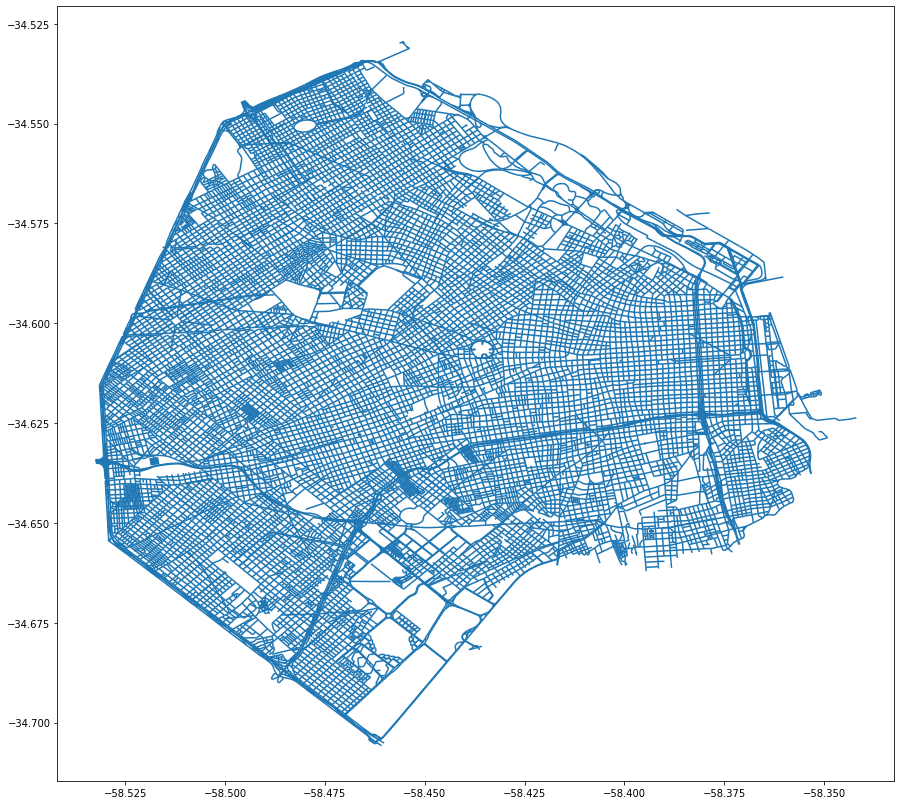

In [92]:
url='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/calles/callejero-ba.geojson'
calles=gpd.read_file(url)
fig,ax=plt.subplots(figsize=(15,15))
calles.plot(ax=ax)

In [93]:
#Solo nos quedamos con las calles de la comuna 13
c13=calles.loc[calles.COMUNA==13,:]
c13.BARRIO.value_counts()

BELGRANO      964
NUÑEZ         622
COLEGIALES    346
PALERMO         1
Name: BARRIO, dtype: int64

In [94]:
c13.drop([1], inplace=True)

C:\Users\krist\anaconda3\envs\plotly\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


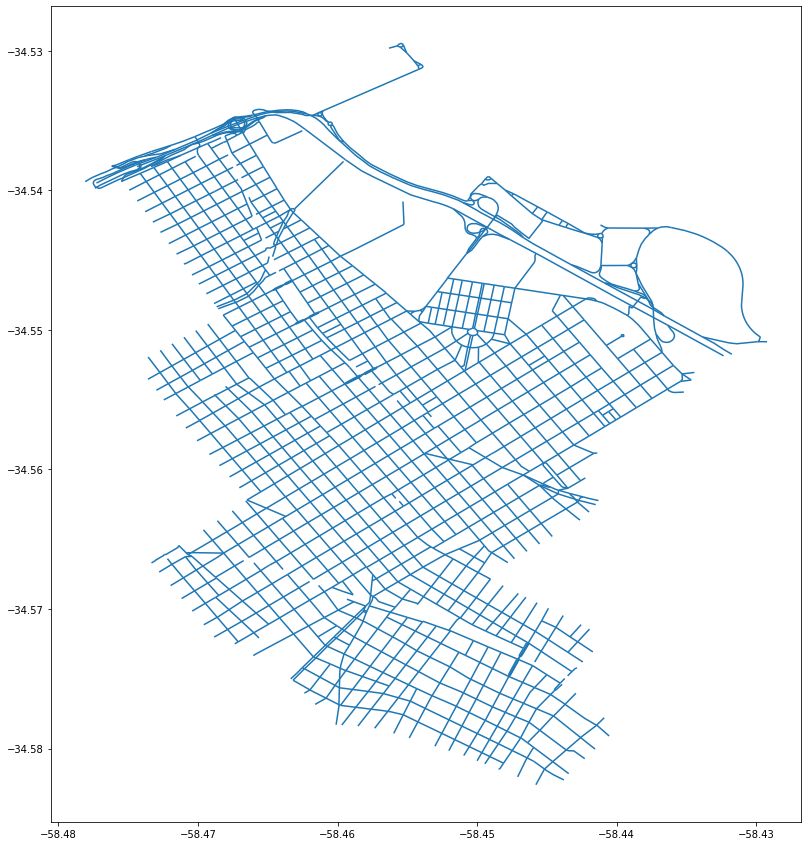

In [95]:
#Ploteamos solamente la comuna 13
fig,ax=plt.subplots(figsize=(15,15))
c13.plot(ax=ax);

In [96]:
#Busco el centroide de cada barrio
barrios=gpd.read_file('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson')
barriosc13=barrios.loc[barrios.comuna==13]
barriosc13

,barrio,comuna,perimetro,area,geometry
23,COLEGIALES,13,6374.619045,2.289774e+06,"POLYGON ((-58.44669 -34.56907, -58.44650 -34.5..."
43,BELGRANO,13,20609.775397,7.999240e+06,"POLYGON ((-58.45057 -34.53561, -58.45066 -34.5..."
46,NUÑEZ,13,10785.261081,4.424199e+06,"POLYGON ((-58.45872 -34.53721, -58.45887 -34.5..."


In [97]:
barriosc13['centroid']=barriosc13.geometry.centroid
barriosc13

<ipython-input-97-c7a9594d37a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barriosc13['centroid']=barriosc13.geometry.centroid


,barrio,comuna,perimetro,area,geometry,centroid
23,COLEGIALES,13,6374.619045,2.289774e+06,"POLYGON ((-58.44669 -34.56907, -58.44650 -34.5...",POINT (-58.45097 -34.57464)
43,BELGRANO,13,20609.775397,7.999240e+06,"POLYGON ((-58.45057 -34.53561, -58.45066 -34.5...",POINT (-58.45024 -34.55476)
46,NUÑEZ,13,10785.261081,4.424199e+06,"POLYGON ((-58.45872 -34.53721, -58.45887 -34.5...",POINT (-58.46275 -34.54348)


In [98]:
barriosc13['centroid lon']=barriosc13.centroid.x
barriosc13['centroid lat']=barriosc13.centroid.y
barriosc13

<ipython-input-98-392a7623648a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barriosc13['centroid lon']=barriosc13.centroid.x
<ipython-input-98-392a7623648a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barriosc13['centroid lat']=barriosc13.centroid.y


,barrio,comuna,perimetro,area,geometry,centroid,centroid lon,centroid lat
23,COLEGIALES,13,6374.619045,2.289774e+06,"POLYGON ((-58.44669 -34.56907, -58.44650 -34.5...",POINT (-58.45097 -34.57464),-58.450968,-34.574642
43,BELGRANO,13,20609.775397,7.999240e+06,"POLYGON ((-58.45057 -34.53561, -58.45066 -34.5...",POINT (-58.45024 -34.55476),-58.450241,-34.554763
46,NUÑEZ,13,10785.261081,4.424199e+06,"POLYGON ((-58.45872 -34.53721, -58.45887 -34.5...",POINT (-58.46275 -34.54348),-58.462751,-34.543481


In [99]:
barriosc13.loc[23,'centroid lat']

-34.57464155506328

In [100]:
#Con esta data, imputo los nulos 
dict_input_lat={'Colegiales':barriosc13.loc[23,'centroid lat'], 'Belgrano':barriosc13.loc[43,'centroid lat'],
                'Nuñez':barriosc13.loc[46,'centroid lat']}
dict_input_lon={'Colegiales':barriosc13.loc[23,'centroid lon'], 'Belgrano':barriosc13.loc[43,'centroid lon'],
                'Nuñez':barriosc13.loc[46,'centroid lon']}

In [101]:
data_comuna.lat.fillna(data_comuna.place_name.map(dict_input_lat), inplace=True)
data_comuna.lon.fillna(data_comuna.place_name.map(dict_input_lon), inplace=True)

In [102]:
#Armamos un GeoDataFrame con nuestro dataframe de propiedades
geometry=[Point(xy) for xy in zip(data_comuna['lon'], data_comuna['lat'])]
geom_data_comuna=gpd.GeoDataFrame(data_comuna,geometry=geometry)
geom_data_comuna.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,Distancia_Tren,log_sup,log_pm2,OrientacionSubte,PiletaTerraza,EstrenarGimnasio,ToiletteSauna,CocheraParrilla,BajasexpensasLuminoso,geometry
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,0.698231,3.806662,8.028346,0,0,0,0,0,0,POINT (-58.44336 -34.55987)
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,0.698231,4.174387,8.006368,0,0,0,0,0,0,POINT (-58.44336 -34.55987)
120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",-34.562697,...,0.551409,4.007333,8.082206,0,0,0,0,0,0,POINT (-58.46016 -34.56270)


#  Hospitales

In [103]:
#Armamos un GeoDataFrame con nuestro datframe de propiedades
geometry=[Point(xy) for xy in zip(data_comuna['lon'], data_comuna['lat'])]
geom_data_comuna=gpd.GeoDataFrame(data_comuna,geometry=geometry)
geom_data_comuna.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,Distancia_Tren,log_sup,log_pm2,OrientacionSubte,PiletaTerraza,EstrenarGimnasio,ToiletteSauna,CocheraParrilla,BajasexpensasLuminoso,geometry
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,0.698231,3.806662,8.028346,0,0,0,0,0,0,POINT (-58.44336 -34.55987)
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,0.698231,4.174387,8.006368,0,0,0,0,0,0,POINT (-58.44336 -34.55987)
120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",-34.562697,...,0.551409,4.007333,8.082206,0,0,0,0,0,0,POINT (-58.46016 -34.56270)


In [104]:
#Traemos el geojson de los hospitales de la pagina del gobierno
urlhospitales='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/hospitales/hospitales.geojson'
hospitales=gpd.read_file(urlhospitales)
hospitales.head(3)

,ID,NOMBRE,NOM_MAP,OBJETO,CALLE,ALTURA,DOM_NORMA,DOM_GEO,TELEFONO,GUARDIA,FAX,WEB,COD_POSTAL,TIPO,TIPO_ESPEC,MOD_AT_1,MOD_AT_2,DEPEND_ADM,DIRECTOR,geometry
0,1.0,HOSPITAL GENERAL DE NIÑOS PEDRO DE ELIZALDE,HOSP. DE ELIZALDE,HOSPITAL,MANUEL A. MONTES DE OCA,40,"MONTES DE OCA, MANUEL AV. 40","40 MONTES DE OCA, MANUEL AV.",4307-5842 / 5844,4307-5442 / 4300-1700,4302-7400,www.elizalde.gov.ar,C1270AAN,Hospital de niños,PEDIATRIA,AT. AMB./INTERNACION,DIAG./TRATAM.,Ministerio de Salud GCBA,Dr. Javier Indart,POINT (-58.37755 -34.62885)
1,2.0,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,HOSP. GUTIERREZ,HOSPITAL,GALLO,1330,GALLO 1330,1330 GALLO,4962-9247 / 9248 / 9280,4962-9232,4962-3762,www.guti.gov.ar,C1425EFD,Hospital de niños,PEDIATRIA,AT. AMB./INTERNACION,DIAG./TRATAM.,Ministerio de Salud GCBA,Dra. María Cristina Galoppo,POINT (-58.41207 -34.59419)
2,4.0,HOSPITAL DE ODONTOLOGIA DR. RAMON CARRILLO (EX...,HOSP. ODONTOLOGICO CARRILLO,HOSPITAL,SANCHEZ DE BUSTAMANTE,2529,SANCHEZ DE BUSTAMANTE 2529,2529 SANCHEZ DE BUSTAMANTE,4805-5521 / 7533,4805-6407,4805-7533,None,C1425DUY,Hospital especializado,ODONTOLOGIA,AT. AMBULATORIA,DIAG./TRATAM.,Ministerio de Salud GCBA,Dra. Susana Rita Lisanti,POINT (-58.40273 -34.58453)


In [105]:
hospitales_mask=hospitales[(hospitales.CALLE=='ECHEVERRIA')|(hospitales.CALLE=='MONROE')] #| hospitales[hospitales.CALLE=='MONROE']
#hospitales_mask
hospitales13=hospitales.iloc[[10,26]]

#  Establecimientos educativos

In [106]:
#Traemos el geojson de los establecimientos educativos de la pagina del gobierno
urleducativos='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/establecimientos-educativos/establecimientos-educativos.geojson'
educativos=gpd.read_file(urleducativos)
educativos.head(3)

educativos13=educativos.loc[educativos.COMUNA==13.0,:]
educativos13.BARRIO.value_counts()

educativos13=educativos13.drop([2767])
dh=educativos.loc[educativos.DOM_ESTABL=='Monroe 860']
dh

,OBJECTID,CUI,CUEANEXO,CUE,ANEXO,SECTOR,DOM_EDIFIC,DOM_ESTABL,NOMBRE_EST,NOMBRE_ABR,...,DEPFUN,DE,COMUNA,BARRIO,AREA_PROGR,ESTADO,POINT_X,POINT_Y,nivel,geometry
2767,2898,0202611,020304400,203044,00,2.0,Monroe 860,Monroe 860,Centro de Formación Profesional - Digital House,CFP Digital House,...,GO de Formación Laboral,10.0,13.0,BELGRANO,07 - HOSP PIROVANO,1,101789.4542,108914.4833,Otros Servicios Educativos de las modalidades ...,POINT (-58.44380 -34.54891)


#  Espacios verdes

In [107]:
#Traemos el geojson de los espacios verdes publicos de la pagina del gobierno
urlverde='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/espacios-verdes/espacio-verde-publico.geojson'
verde=gpd.read_file(urlverde)

verde13=verde.loc[verde.COMUNA==13.0,:]

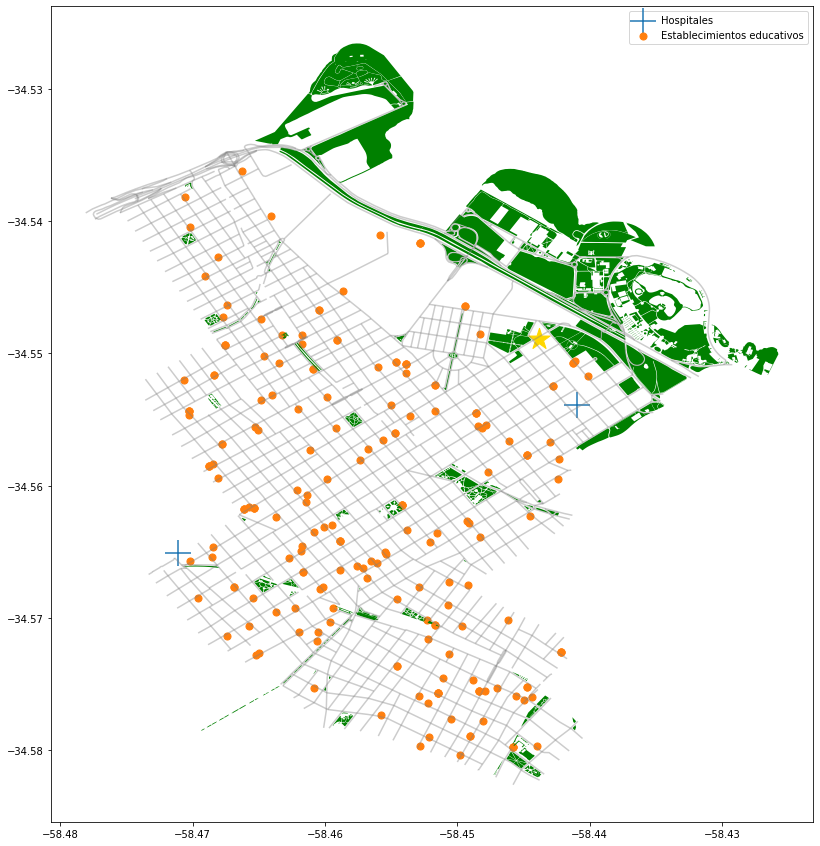

In [108]:
fig,ax=plt.subplots(figsize=(15,15))
c13.plot(ax=ax, alpha=0.4, color='grey')
f=hospitales13.plot(ax=ax,markersize=700, marker='+', label='Hospitales')
educativos13.plot(ax=ax,markersize=50, marker='o', label='Establecimientos educativos')
dh.plot(ax=ax, markersize=500, marker='*', color='gold')
verde13.plot(ax=ax,color='green', label='Espacios verdes publicos')
plt.legend(loc='best', frameon=True)

In [109]:
def distancias(df_new, name):
    geom_data_comuna_ = geom_data_comuna.copy()
    df_dists = pd.DataFrame()
    for i in range(len(df_new)):
        df_dists[i] = geom_data_comuna_.geometry.distance(df_new.geometry.iloc[i])
    geom_data_comuna_[name] = df_dists.min(axis=1)
    return geom_data_comuna_

In [110]:
geom_data_comuna=distancias(hospitales, 'Hospitales')

In [111]:
geom_data_comuna=distancias(educativos, 'Educativos')

In [112]:
geom_data_comuna=distancias(verde, 'Verde')
geom_data_comuna.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,OrientacionSubte,PiletaTerraza,EstrenarGimnasio,ToiletteSauna,CocheraParrilla,BajasexpensasLuminoso,geometry,Hospitales,Educativos,Verde
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,0,0,0,0,0,0,POINT (-58.44336 -34.55987),0.006431,0.001038,0.001251
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,0,0,0,0,0,0,POINT (-58.44336 -34.55987),0.006431,0.001038,0.001251
120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",-34.562697,...,0,0,0,0,0,0,POINT (-58.46016 -34.56270),0.011173,0.000434,0.001092
210,210,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",-34.562084,...,1,0,0,0,1,0,POINT (-58.45669 -34.56208),0.014695,0.002619,0.000770
216,216,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5621457,-58.449657",-34.562146,...,0,0,0,1,0,0,POINT (-58.44966 -34.56215),0.011967,0.000636,0.001192


In [113]:
data_comuna=geom_data_comuna.loc[:,geom_data_comuna.columns.drop(['geometry'])]

# Split 

In [287]:
feature_cols=data_.columns.drop(['precio_m2', 'log_pm2'])
X=data_.loc[:,feature_cols]
y=data_.precio_m2
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [288]:
print(data_.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(2427, 78)
(1820, 76)
(1820,)
(607, 76)


In [289]:
type(y_train)

pandas.core.series.Series

In [290]:
y_train.head()

488     3571.428571
1703    3243.243243
377     4270.270270
2659    2200.000000
1683    2769.230769
Name: precio_m2, dtype: float64

In [291]:
X_train.head()

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,Tipo_house,Distancia_Subte,Distancia_Tren,log_sup,OrientacionSubte,PiletaTerraza,EstrenarGimnasio,ToiletteSauna,CocheraParrilla,BajasexpensasLuminoso
488,31523.0,31523.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5690274772,-58.4470182068",...,0,0.993627,0.633567,3.737670,0,0,0,0,0,0
1703,77802.0,77802.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,...,0,NaN,NaN,3.610918,0,0,0,0,0,0
377,24431.0,24431.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5699598,-58.4347443",...,0,0.673704,1.276486,5.220356,0,1,0,1,1,0
2659,113955.0,113955.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5681243,-58.471432",...,0,1.238775,1.743327,3.912023,0,0,0,0,0,0
1683,77186.0,77186.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5615751,-58.4655199",...,0,0.683114,0.950691,4.174387,0,0,0,0,0,0


# Imputacion de Distancias a Tren y Subte

Subte

In [292]:
grupo_place_property = X_train.groupby(['place_name','property_type'])
g_subte_mean= grupo_place_property['Distancia_Subte'].mean().round(2)
g_subte_mean

place_name  property_type
Belgrano    PH               0.77
            apartment        0.69
            house            1.01
Name: Distancia_Subte, dtype: float64

In [293]:
#reseteo el indice para poder hacer un merge
gsm_reset = g_subte_mean.reset_index()
gsm_reset

,place_name,property_type,Distancia_Subte
0,Belgrano,PH,0.77
1,Belgrano,apartment,0.69
2,Belgrano,house,1.01


In [294]:
#usamos merge para unir por place_name y property_type, 
#how=left para que preserve todos los registros de X_train,
#agrego como sufijo _group para distinguir las columnas que vienen del grupo
X_train = pd.merge(X_train, gsm_reset, on=['place_name', 'property_type'], how = 'left', 
                  suffixes=('', '_group'))
X_train.head(2)

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,Distancia_Subte,Distancia_Tren,log_sup,OrientacionSubte,PiletaTerraza,EstrenarGimnasio,ToiletteSauna,CocheraParrilla,BajasexpensasLuminoso,Distancia_Subte_group
0,31523.0,31523.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5690274772,-58.4470182068",...,0.993627,0.633567,3.737670,0,0,0,0,0,0,0.69
1,77802.0,77802.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,...,NaN,NaN,3.610918,0,0,0,0,0,0,0.69


In [295]:
#seleccionamos todos los registros que tienen null en Distancia_Subte 
#y les asignamos el valor que tienen en 'Distancia_Subte_group'
distancia_subte_null_mask = X_train.Distancia_Subte.isna()
distancia_subte_null_mask.sum()

496

In [296]:
X_train.loc[distancia_subte_null_mask, "Distancia_Subte"] = X_train.loc[distancia_subte_null_mask, "Distancia_Subte_group"]

#verifico que no hay mas nulos:
X_train["Distancia_Subte"].isnull().sum()

0

Tren

In [297]:
g_tren_mean= grupo_place_property['Distancia_Tren'].mean().round(2)
g_tren_mean

place_name  property_type
Belgrano    PH               0.95
            apartment        0.76
            house            1.17
Name: Distancia_Tren, dtype: float64

In [298]:
#reseteo el indice para poder hacer un merge
gtm_reset = g_tren_mean.reset_index()
gtm_reset

,place_name,property_type,Distancia_Tren
0,Belgrano,PH,0.95
1,Belgrano,apartment,0.76
2,Belgrano,house,1.17


In [299]:
#usamos merge para unir por place_name y property_type, 
#how=left para que preserve todos los registros de X_train,
#agrego como sufijo _group para distinguir las columnas que vienen del grupo
X_train = pd.merge(X_train, gtm_reset, on=['place_name', 'property_type'], how = 'left', 
                  suffixes=('', '_group'))


In [300]:
#seleccionamos todos los registros que tienen null en Distancia_Subte 
#y les asignamos el valor que tienen en 'Distancia_Tren_group'
distancia_tren_null_mask = X_train.Distancia_Tren.isna()
distancia_tren_null_mask.sum()

496

In [301]:
X_train.loc[distancia_tren_null_mask, "Distancia_Tren"] = X_train.loc[distancia_tren_null_mask, "Distancia_Tren_group"]

#verifico que no hay mas nulos:
X_train["Distancia_Tren"].isnull().sum()

0

In [302]:
X_train.head(6)

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,Distancia_Tren,log_sup,OrientacionSubte,PiletaTerraza,EstrenarGimnasio,ToiletteSauna,CocheraParrilla,BajasexpensasLuminoso,Distancia_Subte_group,Distancia_Tren_group
0,31523.0,31523.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5690274772,-58.4470182068",...,0.633567,3.737670,0,0,0,0,0,0,0.69,0.76
1,77802.0,77802.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,...,0.760000,3.610918,0,0,0,0,0,0,0.69,0.76
2,24431.0,24431.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5699598,-58.4347443",...,1.276486,5.220356,0,1,0,1,1,0,0.69,0.76
3,113955.0,113955.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5681243,-58.471432",...,1.743327,3.912023,0,0,0,0,0,0,0.69,0.76
4,77186.0,77186.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5615751,-58.4655199",...,0.950691,4.174387,0,0,0,0,0,0,0.69,0.76
5,116414.0,116414.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.552828,-58.451272",...,0.847309,3.610918,0,0,0,0,0,0,0.69,0.76


# Imputacion train de Ambientes

In [303]:
group1 = X_train.groupby(['place_name','property_type', "superficie_fill"])["Ambientes"].mean()
group2 = X_train.groupby(['property_type', "superficie_fill"])["Ambientes"].mean()
group3 = X_train.groupby(["superficie_fill"])["Ambientes"].mean()
group9 = X_train.groupby(["property_type"])["Ambientes"].mean()
X_train["Ambientes"] = X_train["Ambientes"].fillna(X_train[['place_name','property_type', "superficie_fill"]].apply(tuple, axis=1).map(group1))
X_train["Ambientes"] = X_train["Ambientes"].fillna(X_train[['property_type', "superficie_fill"]].apply(tuple, axis=1).map(group2))
X_train["Ambientes"] = X_train["Ambientes"].fillna(X_train["superficie_fill"].map(group3))

In [304]:
X_train["Ambientes"].isnull().sum()

22

In [305]:
X_train['Ambientes'].fillna((X_train['Ambientes'].mean()), inplace=True)

In [306]:
X_train["Ambientes"].isnull().sum()

0

# Imputacion train de banos

In [307]:
X_train.Banos.isnull().sum()

615

In [308]:
group4 = X_train.groupby(['place_name','property_type', "superficie_fill"])["Banos"].mean()
group5 = X_train.groupby(['property_type', "superficie_fill"])["Banos"].mean()
group6 = X_train.groupby(["superficie_fill"])["Banos"].mean()
group8 = X_train.groupby(["property_type"])["Banos"].mean()

In [309]:
X_train["Banos"] = X_train["Banos"].fillna(X_train[['place_name','property_type', "superficie_fill"]].apply(tuple, axis=1).map(group4))
X_train["Banos"] = X_train["Banos"].fillna(X_train[['property_type', "superficie_fill"]].apply(tuple, axis=1).map(group5))
X_train["Banos"] = X_train["Ambientes"].fillna(X_train["superficie_fill"].map(group6))

In [310]:
X_train["Banos"].isnull().sum()

0

#  Imputacion train superficie

In [311]:
X_train.superficie_fill.isnull().sum()

0

In [312]:
#Armamos grupos nuevos para superficie
group7 = X_train.groupby(['place_name','property_type'])["superficie_fill"].mean()

In [313]:
X_train["superficie_fill"] = X_train["superficie_fill"].fillna(X_train[['place_name','property_type']].apply(tuple, axis=1).map(group7))

In [314]:
X_train.superficie_fill.isnull().sum()

0

#  Imputacion de Expensas en train

In [315]:
groupexp = X_train.groupby(['place_name','property_type', "superficie_fill"])["Expensas"].mean()
groupexp1 = X_train.groupby(['property_type', "superficie_fill"])["Expensas"].mean()
groupexp2 = X_train.groupby(["superficie_fill"])["Expensas"].mean()
groupexp3 = X_train.groupby(["property_type"])["Expensas"].mean()

X_train["Expensas"] = X_train["Expensas"].fillna(X_train[['place_name','property_type', "superficie_fill"]].apply(tuple, axis=1).map(groupexp))
X_train["Expensas"] = X_train["Expensas"].fillna(X_train[['property_type', "superficie_fill"]].apply(tuple, axis=1).map(groupexp1))
X_train["Expensas"] = X_train["Expensas"].fillna(X_train["superficie_fill"].map(groupexp2))
X_train["Expensas"] = X_train["Expensas"].fillna(X_train["property_type"].map(groupexp3))

In [316]:
X_train["Expensas"].isnull().sum()

0

## Una vez que terminamos de imputar, podemos arrancar a modelar

In [317]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [318]:
X_train.head(4)

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,Distancia_Tren,log_sup,OrientacionSubte,PiletaTerraza,EstrenarGimnasio,ToiletteSauna,CocheraParrilla,BajasexpensasLuminoso,Distancia_Subte_group,Distancia_Tren_group
0,31523.0,31523.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5690274772,-58.4470182068",...,0.633567,3.737670,0,0,0,0,0,0,0.69,0.76
1,77802.0,77802.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,...,0.760000,3.610918,0,0,0,0,0,0,0.69,0.76
2,24431.0,24431.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5699598,-58.4347443",...,1.276486,5.220356,0,1,0,1,1,0,0.69,0.76
3,113955.0,113955.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5681243,-58.471432",...,1.743327,3.912023,0,0,0,0,0,0,0.69,0.76


In [319]:
X_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'operation', 'property_type',
       'place_name', 'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'superficie_fill', 'to_fill', 'sup_regex', 'Terraza',
       'Subte', 'Parrilla', 'Pileta', 'Balcon', 'Cochera', 'Baulera', 'Jardin',
       'Lavadero', 'Luminoso', 'Patio', 'Gimnasio', 'Sum', 'Estrenar',
       'Toilette', 'Sauna', 'Suite', 'Vestidor', 'Dependencia', 'Lujoso',
       'Amenities', 'Parquet', 'Aire', 'BajasExpensas', 'semipiso',
       'monoambiente', 'duplex', 'Habitaciones', 'Ambientes', 'Banos',
       'Banos1', 'Orientacion', 'Expensas', 'Barrio_Colegiales',
       'Barrio_Nuñez', 'Tipo_apartment', 'Tipo_house'

In [320]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
#Scaler

In [321]:
col_null_X_train=X_train.columns.drop(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'to_fill', 'Habitaciones','sup_regex', 'Banos1'])
X_train=X_train.loc[:,col_null_X_train]

In [322]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1819
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           1820 non-null   float64
 1   superficie_fill        1820 non-null   float64
 2   Terraza                1820 non-null   int64  
 3   Subte                  1820 non-null   int64  
 4   Parrilla               1820 non-null   int64  
 5   Pileta                 1820 non-null   int64  
 6   Balcon                 1820 non-null   int64  
 7   Cochera                1820 non-null   int64  
 8   Baulera                1820 non-null   int64  
 9   Jardin                 1820 non-null   int64  
 10  Lavadero               1820 non-null   int64  
 11  Luminoso               1820 non-null   int64  
 12  Patio                  1820 non-null   int64  
 13  Gimnasio               1820 non-null   int64  
 14  Sum                    1820 non-null   int64  
 15  Estr

In [323]:
#Escalamos las columnas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [324]:
poly=PolynomialFeatures(2,include_bias=False)
X_train=poly.fit_transform(X_train)   #generamos Features polinomicas

#  Cross-Validation

In [325]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [326]:
alpha_lasso=np.linspace(8,20,1000)
alpha_ridge=np.linspace(500,2400,1000)

#alpha_lasso = 14
#alpha_ridge = 1871


lasso=LassoCV(alphas=alpha_lasso)
ridge=RidgeCV(alphas=alpha_ridge)

lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 500.        ,  501.9019019 ,  503.8038038 ,  505.70570571,
        507.60760761,  509.50950951,  511.41141141,  513.31331331,
        515.21521522,  517.11711712,  519.01901902,  520.92092092,
        522.82282282,  524.72472472,  526.62662663,  528.52852853,
        530.43043043,  532.33233233,  534.23423423,  536.13613614,
        538.03803804,  539.93993994,  541.84184184,  543.74374374,
        545.64564565,  547.54754755,...
       2363.86386386, 2365.76576577, 2367.66766767, 2369.56956957,
       2371.47147147, 2373.37337337, 2375.27527528, 2377.17717718,
       2379.07907908, 2380.98098098, 2382.88288288, 2384.78478478,
       2386.68668669, 2388.58858859, 2390.49049049, 2392.39239239,
       2394.29429429, 2396.1961962 , 2398.0980981 , 2400.        ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [327]:
print(lasso.alpha_)
print(ridge.alpha_)

14.366366366366366
1871.2712712712712


In [328]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=lasso.alpha_, max_iter=2500)

print(cross_val_score(model,X_train,y_train).mean())

0.46839944195891936


In [329]:
print(cross_val_score(ridge,X_train,y_train).mean())

0.4671939609460276


In [330]:
#Elastic Net 
from sklearn.linear_model import ElasticNetCV
alpha_elasticnet=np.linspace(0.01, 10, 50)
elastic=ElasticNetCV(alphas=alpha_elasticnet, max_iter=6000)
elastic.fit(X_train,y_train)
print(elastic.alpha_)

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65398967.32356003, tolerance: 106975.08326712048
  tol, rng, random, positive)
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69583131.64350636, tolerance: 108386.55833902935
  tol, rng, random, positive)
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69783433.08438784, tolerance: 103527.94667646947
  tol, rng, random, positive)
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\li

1.8448979591836736


In [331]:
print(cross_val_score(estimator=elastic, X=X_train, y=y_train, cv=5).mean())

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35434597.88447503, tolerance: 87893.46550261354
  positive)
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39045352.64618747, tolerance: 85628.06405352047
  positive)
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41305852.37137842, tolerance: 82755.2143067961
  positive)
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

0.4663552256521902


## Imputo Test con los estimadores de train

#  Imputo test de Ambientes

In [334]:
X_test["Ambientes"].isnull().sum()

125

In [335]:
X_test["Ambientes"] = X_test["Ambientes"].fillna(X_test[['place_name','property_type', "superficie_fill"]].apply(tuple, axis=1).map(group1))
X_test["Ambientes"] = X_test["Ambientes"].fillna(X_test[['property_type', "superficie_fill"]].apply(tuple, axis=1).map(group2))
X_test["Ambientes"] = X_test["Ambientes"].fillna(X_test["superficie_fill"].map(group3))
X_test["Ambientes"] = X_test["Ambientes"].fillna(X_test["property_type"].map(group9))

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [336]:
X_test["Ambientes"].isnull().sum()

0

#  Imputo test Banos

In [337]:
X_test["Banos"].isnull().sum()

207

In [338]:
X_test["Banos"] = X_test["Banos"].fillna(X_test[['place_name','property_type', "superficie_fill"]].apply(tuple, axis=1).map(group4))
X_test["Banos"] = X_test["Banos"].fillna(X_test[['property_type', "superficie_fill"]].apply(tuple, axis=1).map(group5))
X_test["Banos"] = X_test["Banos"].fillna(X_test["superficie_fill"].map(group6))
X_test["Banos"] = X_test["Banos"].fillna(X_test["property_type"].map(group8))

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [339]:
X_test["Banos"].isnull().sum()

0

#  Imputo test superficie

In [340]:
X_test.superficie_fill.isnull().sum()

0

In [341]:
X_test["superficie_fill"] = X_test["superficie_fill"].fillna(X_test[['place_name','property_type']].apply(tuple, axis=1).map(group7))

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [342]:
X_test.superficie_fill.isnull().sum()

0

#  Imputo test Expensas

In [343]:
X_test["Expensas"] = X_test["Expensas"].fillna(X_test[['place_name','property_type', "superficie_fill"]].apply(tuple, axis=1).map(groupexp))
X_test["Expensas"] = X_test["Expensas"].fillna(X_test[['property_type', "superficie_fill"]].apply(tuple, axis=1).map(groupexp1))
X_test["Expensas"] = X_test["Expensas"].fillna(X_test["superficie_fill"].map(groupexp2))
X_test["Expensas"] = X_test["Expensas"].fillna(X_test["property_type"].map(groupexp3))

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [344]:
X_test.Expensas.isnull().sum()

0

#  Imputo Distancia Tren y distancia subte para test

In [345]:
grupo_place_property_test = X_test.groupby(['place_name','property_type'])
g_subte_mean_test= grupo_place_property_test['Distancia_Subte'].mean().round(2)
#reseteo el indice para poder hacer un merge
gsm_reset_test = g_subte_mean_test.reset_index()
#usamos merge para unir por place_name y property_type, 
#how=left para que preserve todos los registros de X_train,
#agrego como sufijo _group para distinguir las columnas que vienen del grupo
X_test = pd.merge(X_test, gsm_reset_test, on=['place_name', 'property_type'], how = 'left', 
                  suffixes=('', '_group'))
#seleccionamos todos los registros que tienen null en Distancia_Subte 
#y les asignamos el valor que tienen en 'Distancia_Subte_group'
distancia_subte_null_mask_test = X_test.Distancia_Subte.isna()
X_test.loc[distancia_subte_null_mask_test, "Distancia_Subte"] = X_test.loc[distancia_subte_null_mask_test, "Distancia_Subte_group"]
#verifico que no hay mas nulos:
X_test["Distancia_Subte"].isnull().sum()

0

In [346]:
g_tren_mean_test= grupo_place_property_test['Distancia_Tren'].mean().round(2)
#reseteo el indice para poder hacer un merge
gtm_reset_test = g_tren_mean_test.reset_index()
#usamos merge para unir por place_name y property_type, 
#how=left para que preserve todos los registros de X_train,
#agrego como sufijo _group para distinguir las columnas que vienen del grupo
X_test = pd.merge(X_test, gtm_reset_test, on=['place_name', 'property_type'], how = 'left', 
                  suffixes=('', '_group'))
#seleccionamos todos los registros que tienen null en Distancia_Subte 
#y les asignamos el valor que tienen en 'Distancia_Tren_group'
distancia_tren_null_mask_test = X_test.Distancia_Tren.isna()
distancia_tren_null_mask_test.sum()
X_test.loc[distancia_tren_null_mask_test, "Distancia_Tren"] = X_test.loc[distancia_tren_null_mask_test, "Distancia_Tren_group"]
#verifico que no hay mas nulos:
X_test["Distancia_Tren"].isnull().sum()

0

In [347]:
data_comuna.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'operation', 'property_type',
       'place_name', 'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'superficie_fill', 'to_fill', 'precio_m2',
       'sup_regex', 'Terraza', 'Subte', 'Parrilla', 'Pileta', 'Balcon',
       'Cochera', 'Baulera', 'Jardin', 'Lavadero', 'Luminoso', 'Patio',
       'Gimnasio', 'Sum', 'Estrenar', 'Toilette', 'Sauna', 'Suite', 'Vestidor',
       'Dependencia', 'Lujoso', 'Amenities', 'Parquet', 'Aire',
       'BajasExpensas', 'semipiso', 'monoambiente', 'duplex', 'Habitaciones',
       'Ambientes', 'Banos', 'Banos1', 'Orientacion', 'Expensas',
       'Barrio_Colegiales', 'Barrio_Nuñez', 'Tipo_apartment',

#  Predecir con el modelo que funciona mejor

In [348]:
col_null_X_test=X_test.columns.drop(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'to_fill', 'Habitaciones', 'sup_regex', 'Banos1'])
X_test=X_test.loc[:,col_null_X_test]

In [349]:
X_test = scaler.transform(X_test)

In [350]:
X_test = poly.transform(X_test)

In [351]:
from sklearn.metrics import r2_score
y_pred = ridge.predict(X_test)
r2_score(y_test, y_pred)

0.41481319630847824

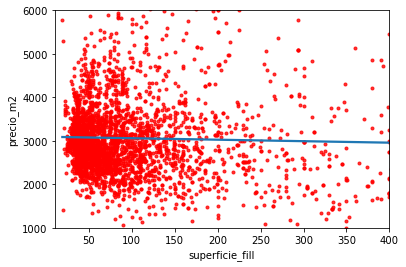

In [352]:
sns.regplot(data_comuna.superficie_fill, data_comuna.precio_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(10,400)
plt.ylim(1000, 6000);

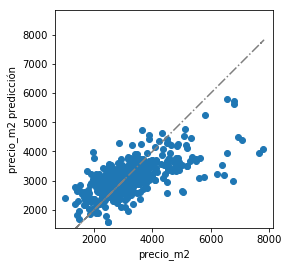

In [353]:
g=plt.scatter(y_test, y_pred)
g.axes.set_xlabel('precio_m2')         #comparacion precio por m2 sobre prediccion
g.axes.set_ylabel('precio_m2 predicción')
g.axes.axis('equal')
g.axes.axis('square')

plt.plot(y,y, '-.',c='grey') 

#las propiedades que quedan del lado izquierdo de la recta tienen mayor precio por m2 en la prediccion que los originales

#  Nos fijamos qué propiedades tienen precio por m2 predicho mayor al de los datos

In [354]:
preciopred = pd.DataFrame (y_pred, columns = ['PrecioPrediccion'])
preciopred  #armamos un df con predicciones de precios

,PrecioPrediccion
0,3040.646878
1,4397.993689
2,2883.998997
3,2899.420699
4,3141.005637
...,...
602,3251.463997
603,3416.193840
604,2695.947701
605,4436.468736


In [355]:
concat = pd.concat([data_comuna, preciopred], axis=1)
concat.head(5) #lo juntamos al df original con todos los datos

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,Distancia_Tren,log_sup,log_pm2,OrientacionSubte,PiletaTerraza,EstrenarGimnasio,ToiletteSauna,CocheraParrilla,BajasexpensasLuminoso,PrecioPrediccion
0,7.0,7.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,0.698231,3.806662,8.028346,0.0,0.0,0.0,0.0,0.0,0.0,3040.646878
1,8.0,8.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,0.698231,4.174387,8.006368,0.0,0.0,0.0,0.0,0.0,0.0,4397.993689
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2883.998997
3,120.0,120.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",...,0.551409,4.007333,8.082206,0.0,0.0,0.0,0.0,0.0,0.0,2899.420699
4,210.0,210.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",...,0.294711,4.043051,8.345343,1.0,0.0,0.0,0.0,1.0,0.0,3141.005637


In [356]:
propiedadesbaratas = concat["PrecioPrediccion"] > concat["precio_m2"]
propiedades = concat.loc[propiedadesbaratas, :]
propiedades.shape   #los que tengan precio predicho mayor al original convienen para invertir

(316, 79)

In [357]:
propiedades.columns.drop(['place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'to_fill', 'Habitaciones','sup_regex', 'Banos1'])

Index(['Unnamed: 0', 'Unnamed: 0.1', 'operation', 'property_type',
       'place_name', 'superficie_fill', 'precio_m2', 'Terraza', 'Subte',
       'Parrilla', 'Pileta', 'Balcon', 'Cochera', 'Baulera', 'Jardin',
       'Lavadero', 'Luminoso', 'Patio', 'Gimnasio', 'Sum', 'Estrenar',
       'Toilette', 'Sauna', 'Suite', 'Vestidor', 'Dependencia', 'Lujoso',
       'Amenities', 'Parquet', 'Aire', 'BajasExpensas', 'semipiso',
       'monoambiente', 'duplex', 'Ambientes', 'Banos', 'Orientacion',
       'Expensas', 'Barrio_Colegiales', 'Barrio_Nuñez', 'Tipo_apartment',
       'Tipo_house', 'Distancia_Subte', 'Distancia_Tren', 'log_sup', 'log_pm2',
       'OrientacionSubte', 'PiletaTerraza', 'EstrenarGimnasio',
       'ToiletteSauna', 'CocheraParrilla', 'BajasexpensasLuminoso',
       'PrecioPrediccion'],
      dtype='object')

In [358]:
propiedades.sort_values('PrecioPrediccion',ascending=True)[0:10]
propiedades

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,Distancia_Tren,log_sup,log_pm2,OrientacionSubte,PiletaTerraza,EstrenarGimnasio,ToiletteSauna,CocheraParrilla,BajasexpensasLuminoso,PrecioPrediccion
1,8.0,8.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,0.698231,4.174387,8.006368,0.0,0.0,0.0,0.0,0.0,0.0,4397.993689
10,229.0,229.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5640079,-58.4567043",...,0.498373,3.496508,7.939537,0.0,0.0,0.0,0.0,0.0,0.0,3044.463412
11,253.0,253.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",...,0.294711,4.852030,7.884671,0.0,0.0,0.0,0.0,0.0,0.0,3596.793854
13,450.0,450.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.562043,-58.461685",...,0.633739,3.784190,7.885740,0.0,0.0,0.0,0.0,0.0,0.0,3338.767539
14,691.0,691.0,sell,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5666711,-58.4720061",...,1.708291,3.951244,7.980392,0.0,0.0,0.0,0.0,0.0,0.0,3189.774476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,38207.0,38207.0,sell,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.558916,-58.471378",...,1.149251,4.499810,8.002657,0.0,0.0,0.0,0.0,0.0,0.0,3217.830094
598,38209.0,38209.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.56304,-58.459933",...,0.560258,4.574711,7.553400,0.0,0.0,0.0,0.0,0.0,0.0,3266.104391
603,38896.0,38896.0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",...,0.294711,4.804021,7.807517,0.0,0.0,0.0,0.0,0.0,0.0,3416.193840
604,38937.0,38937.0,sell,house,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5752126563,-58.4759983049",...,2.557953,5.075174,7.431003,1.0,0.0,0.0,0.0,0.0,0.0,2695.947701


In [359]:
propiedades[['PrecioPrediccion', 'precio_m2']]  #comparamos la diferencia de precio por m2 de esas propiedades

,PrecioPrediccion,precio_m2
1,4397.993689,3000.000000
10,3044.463412,2806.060606
11,3596.793854,2656.250000
13,3338.767539,2659.090909
14,3189.774476,2923.076923
...,...,...
597,3217.830094,2988.888889
598,3266.104391,1907.216495
603,3416.193840,2459.016393
604,2695.947701,1687.500000
